In [1]:
import os
os.getcwd()

'C:\\Users\\acer'

In [3]:
import pandas as pd
import seaborn as sns


In [4]:
import matplotlib.pyplot as plt
def V(l,k):
    l_k=l.diff(k)
    l_1=l.diff()
    num=l_k.var()
    den=l_1.var()
    return num/den

def variograph(l,lim=100):
    i=1
    g=[]
    while i<=lim:
        g_i=V(l,i)/V(l,1)
        g.append(g_i)
        i+=1
    g=pd.Series(g)
    lag=pd.Series(range(1,lim+1))
    plt.plot(lag,g)#,title="Variogram analysis")
    #plt.set_title("Variogram analysis of {}".format(l))

In [20]:
daily_data=pd.read_csv("D:\spotle_intern\daily_mterms.csv")
daily_data["created_at"]=pd.to_datetime(daily_data["created_at"])
daily_data=daily_data.sort_values("created_at")
daily_data=daily_data.reset_index(drop=True)
daily_data.columns=["created_at","daily_frequency"]


In [21]:
daily_data

created_at  daily_frequency
0   2020-01-22             2741
1   2020-01-23            21535
2   2020-01-24            82902
3   2020-01-25           125457
4   2020-01-26           161112
..         ...              ...
102 2020-05-04            69114
103 2020-05-05            63570
104 2020-05-06            55661
105 2020-05-07            56398
106 2020-05-08            55630

[107 rows x 2 columns]

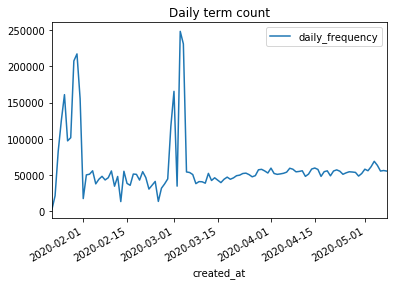

In [9]:
daily_data.plot.line(x="created_at",y="daily_frequency",title="Daily term count")

In [12]:
daily_data[daily_data["daily_frequency"]>100000]#["created_at"]

created_at  daily_frequency
3  2020-01-25           125457
4  2020-01-26           161112
6  2020-01-28           101650
7  2020-01-29           207654
8  2020-01-30           217326
9  2020-01-31           155520
37 2020-02-29           117361
38 2020-03-01           165666
40 2020-03-03           248455
41 2020-03-04           231168

count       107.000000
mean      60741.121495
std       40907.739449
min        2741.000000
25%       45517.000000
50%       52276.000000
75%       56081.500000
max      248455.000000
Name: daily_frequency, dtype: float64


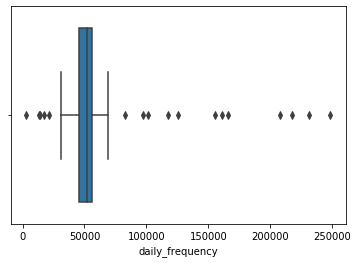

In [11]:
print(daily_data["daily_frequency"].describe())
sns.boxplot(daily_data["daily_frequency"])


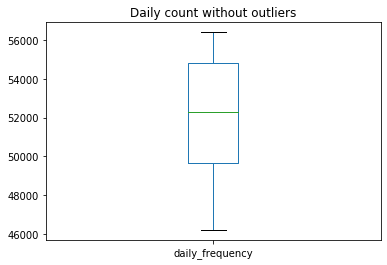

In [381]:
d1=daily_data[(daily_data["daily_frequency"]<=57000) &(daily_data["daily_frequency"]>=45517)]
d1.plot.box(y="daily_frequency",title="Daily count without outliers")
print(len(d1.index))

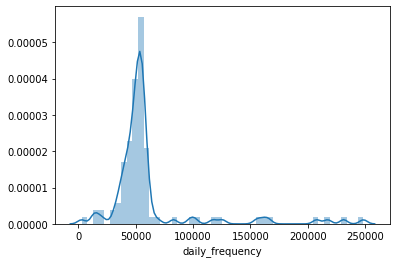

In [383]:
sns.distplot(daily_data["daily_frequency"])

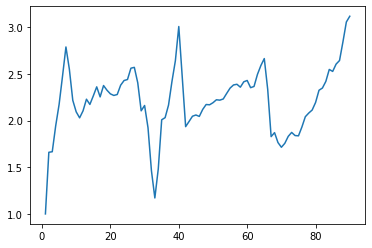

In [586]:
variograph(daily_data["daily_frequency"],90)

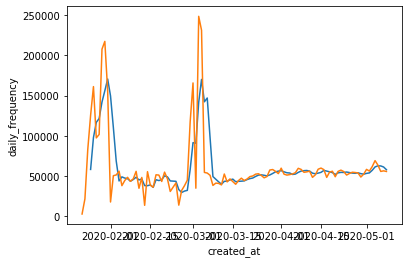

In [43]:
# Moving average time series with original time series
sns.lineplot(y=daily_data["daily_frequency"].rolling(4).mean(),x=daily_data["created_at"])
sns.lineplot(y=daily_data["daily_frequency"],x=daily_data["created_at"])

In [57]:
d2=daily_data[(daily_data["daily_frequency"]<=60000) & (daily_data["daily_frequency"]>20000)]

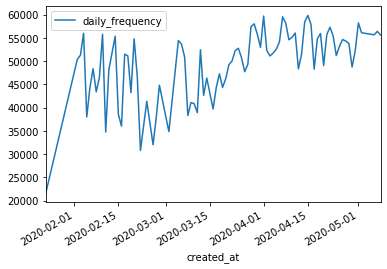

In [58]:
d2.plot.line(x="created_at",y="daily_frequency")

In [68]:
len(d2.daily_frequency.index)

88

# Termwise Analysis

In [530]:
df_terms=pd.read_csv("D:\spotle_intern\d_more_termwise.csv")

In [77]:
df_terms=df_terms.fillna(0)

In [78]:
df_terms.columns

Index(['created_at', 'china', 'covid19', 'corona', 'wuhan', 'pandemic',
       'lockdown', 'spread', 'coronavirus', 'covid', 'coronavirus_outbreak',
       'flu', 'stay_home', 'social_distance', 'coronavirus_case',
       'novel_coronavirus', 'covid 19', 'psa', 'cough', 'fever', 'facial_mask',
       'psa_facial_mask', 'wuhanvirus', 'chinavirus', 'symptomatic',
       'respiratory illness', 'headache', 'sore throat', 'runny nose',
       'respiratory virus', 'merscov'],
      dtype='object')

In [79]:
df_terms["covid"]=df_terms["covid19"]+df_terms["covid 19"]+df_terms["covid"]
df_terms.drop(["covid19","covid 19"],axis=1,inplace=True)
df_terms["facial_mask"]=df_terms["facial_mask"]+df_terms["psa_facial_mask"]+df_terms["psa"]
df_terms.drop(["psa_facial_mask","psa"],axis=1,inplace=True)

In [83]:
#df_terms.fillna(0,inplace=True)
df_terms=df_terms.sort_values("created_at")

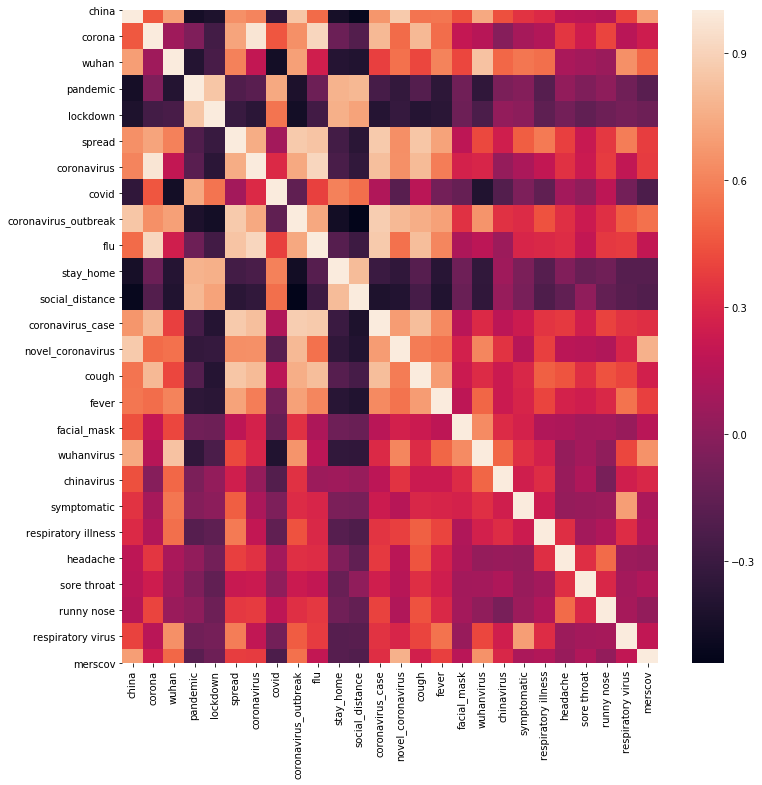

In [44]:
import matplotlib.pyplot as plt
#fig,ax=plt.subplots((1,2),figsize=(10,10))
plt.subplots(figsize=(12,12))
sns.heatmap(df_terms.corr())#,plot=ax1)
#sns.heatmap(log_df.corr())#,plot=ax2)

In [71]:
df_terms.columns

Index(['created_at', 'china', 'corona', 'wuhan', 'pandemic', 'lockdown',
       'spread', 'coronavirus', 'covid', 'coronavirus_outbreak', 'flu',
       'stay_home', 'social_distance', 'coronavirus_case', 'novel_coronavirus',
       'cough', 'fever', 'facial_mask', 'wuhanvirus', 'chinavirus',
       'symptomatic', 'respiratory illness', 'headache', 'sore throat',
       'runny nose', 'respiratory virus', 'merscov'],
      dtype='object')

In [7]:
# covid Confirmed and deaths data

d=pd.read_csv("D:\spotle_intern\case_death.csv")
d

Unnamed: 0        Date         Country                Province/State  \
0           1288  2020-01-22       Australia  Australian Capital Territory   
1           1289  2020-01-23       Australia  Australian Capital Territory   
2           1290  2020-01-24       Australia  Australian Capital Territory   
3           1291  2020-01-25       Australia  Australian Capital Territory   
4           1292  2020-01-26       Australia  Australian Capital Territory   
...          ...         ...             ...                           ...   
5952       41533  2020-06-26  United Kingdom      Turks and Caicos Islands   
5953       41534  2020-06-27  United Kingdom      Turks and Caicos Islands   
5954       41535  2020-06-28  United Kingdom      Turks and Caicos Islands   
5955       41536  2020-06-29  United Kingdom      Turks and Caicos Islands   
5956       41537  2020-06-30  United Kingdom      Turks and Caicos Islands   

          Lat      Long  Confirmed  Recovered  Deaths  
0    -35.4735  149.0124        0.0        0.0     0.0  
1    -35.4735  149.0124        0.0        0.0     0.0  
2    -35.4735  149.0124        0.0        0.0     0.0  
3    -35.4735  149.0124        0.0        0.0     0.0  
4    -35.4735  149.0124        0.0        0.0     0.0  
...       ...       ...        ...        ...     ...  
5952  21.6940  -71.7979       16.0       11.0     1.0  
5953  21.6940  -71.7979       16.0       11.0     1.0  
5954  21.6940  -71.7979       28.0       11.0     1.0  
5955  21.6940  -71.7979       41.0       11.0     1.0  
5956  21.6940  -71.7979       41.0       11.0     2.0  

[5957 rows x 9 columns]

In [8]:
f=d.groupby(["Country","Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).reset_index()

In [9]:
#Taking english speaking countries' data
set(f["Country"])

{'Australia', 'Canada', 'India', 'New Zealand', 'US', 'United Kingdom'}

In [10]:
f.columns
f

Country        Date  Confirmed  Recovered   Deaths
0         Australia  2020-01-22        0.0        0.0      0.0
1         Australia  2020-01-23        0.0        0.0      0.0
2         Australia  2020-01-24        0.0        0.0      0.0
3         Australia  2020-01-25        0.0        0.0      0.0
4         Australia  2020-01-26        4.0        0.0      0.0
..              ...         ...        ...        ...      ...
961  United Kingdom  2020-06-26   310836.0     1363.0  43498.0
962  United Kingdom  2020-06-27   311727.0     1364.0  43598.0
963  United Kingdom  2020-06-28   312640.0     1364.0  43634.0
964  United Kingdom  2020-06-29   313470.0     1368.0  43659.0
965  United Kingdom  2020-06-30   314160.0     1370.0  43815.0

[966 rows x 5 columns]

In [11]:
f["Date"]=pd.to_datetime(f["Date"])

In [12]:
f

Country       Date  Confirmed  Recovered   Deaths
0         Australia 2020-01-22        0.0        0.0      0.0
1         Australia 2020-01-23        0.0        0.0      0.0
2         Australia 2020-01-24        0.0        0.0      0.0
3         Australia 2020-01-25        0.0        0.0      0.0
4         Australia 2020-01-26        4.0        0.0      0.0
..              ...        ...        ...        ...      ...
961  United Kingdom 2020-06-26   310836.0     1363.0  43498.0
962  United Kingdom 2020-06-27   311727.0     1364.0  43598.0
963  United Kingdom 2020-06-28   312640.0     1364.0  43634.0
964  United Kingdom 2020-06-29   313470.0     1368.0  43659.0
965  United Kingdom 2020-06-30   314160.0     1370.0  43815.0

[966 rows x 5 columns]

In [13]:
daily_data

created_at  daily_frequency
0   2020-01-22             2741
1   2020-01-23            21535
2   2020-01-24            82902
3   2020-01-25           125457
4   2020-01-26           161112
..         ...              ...
102 2020-05-04            69114
103 2020-05-05            63570
104 2020-05-06            55661
105 2020-05-07            56398
106 2020-05-08            55630

[107 rows x 2 columns]

In [14]:
f=f[f["Date"].isin(daily_data["created_at"])]
f

Country       Date  Confirmed  Recovered   Deaths
0         Australia 2020-01-22        0.0        0.0      0.0
1         Australia 2020-01-23        0.0        0.0      0.0
2         Australia 2020-01-24        0.0        0.0      0.0
3         Australia 2020-01-25        0.0        0.0      0.0
4         Australia 2020-01-26        4.0        0.0      0.0
..              ...        ...        ...        ...      ...
908  United Kingdom 2020-05-04   191832.0      910.0  28809.0
909  United Kingdom 2020-05-05   196243.0      926.0  29501.0
910  United Kingdom 2020-05-06   202359.0      934.0  30150.0
911  United Kingdom 2020-05-07   207977.0      970.0  30689.0
912  United Kingdom 2020-05-08   212629.0      997.0  31316.0

[642 rows x 5 columns]

In [15]:
f=f.groupby("Date").agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).reset_index()

<bound method DataFrame.reset_index of     created_at  daily_frequency
0   2020-01-22             2741
1   2020-01-23            21535
2   2020-01-24            82902
3   2020-01-25           125457
4   2020-01-26           161112
..         ...              ...
102 2020-05-04            69114
103 2020-05-05            63570
104 2020-05-06            55661
105 2020-05-07            56398
106 2020-05-08            55630

[107 rows x 2 columns]>

In [28]:
daily_data

created_at  daily_frequency
0   2020-01-22             2741
1   2020-01-23            21535
2   2020-01-24            82902
3   2020-01-25           125457
4   2020-01-26           161112
..         ...              ...
102 2020-05-04            69114
103 2020-05-05            63570
104 2020-05-06            55661
105 2020-05-07            56398
106 2020-05-08            55630

[107 rows x 2 columns]

In [16]:
f["daily_cases"]=f["Confirmed"].diff()
f["daily_cases"][0]=1
f["daily_deaths"]=f["Deaths"].diff()
f["daily_deaths"][0]=0
f["daily_frequency"]=daily_data["daily_frequency"]#.cumsum()
f["cum_frequency"]=f["daily_frequency"].cumsum()
f
f.drop("daily_frequency",axis=1,inplace=True)
f

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Date  Confirmed  Recovered    Deaths  daily_cases  daily_deaths  \
0   2020-01-22        1.0        0.0       0.0          1.0           0.0   
1   2020-01-23        1.0        0.0       0.0          0.0           0.0   
2   2020-01-24        2.0        0.0       0.0          1.0           0.0   
3   2020-01-25        2.0        0.0       0.0          0.0           0.0   
4   2020-01-26       10.0        0.0       0.0          8.0           0.0   
..         ...        ...        ...       ...          ...           ...   
102 2020-05-04  1492645.0   234156.0  103731.0      31874.0        1920.0   
103 2020-05-05  1525492.0   239156.0  106889.0      32847.0        3158.0   
104 2020-05-06  1561950.0   241722.0  110194.0      36458.0        3305.0   
105 2020-05-07  1600341.0   249467.0  113223.0      38391.0        3029.0   
106 2020-05-08  1636974.0   255606.0  115611.0      36633.0        2388.0   

     cum_frequency  
0             2741  
1            24276  
2           107178  
3           232635  
4           393747  
..             ...  
102        6268041  
103        6331611  
104        6387272  
105        6443670  
106        6499300  

[107 rows x 7 columns]

In [18]:
#daily_data=pd.read_csv("D:\spotle_intern\daily_mterms.csv")

In [22]:
daily_data=pd.concat([daily_data,f[f.columns[1:]]],axis=1)
daily_data

created_at  daily_frequency  Confirmed  Recovered    Deaths  daily_cases  \
0   2020-01-22             2741        1.0        0.0       0.0          1.0   
1   2020-01-23            21535        1.0        0.0       0.0          0.0   
2   2020-01-24            82902        2.0        0.0       0.0          1.0   
3   2020-01-25           125457        2.0        0.0       0.0          0.0   
4   2020-01-26           161112       10.0        0.0       0.0          8.0   
..         ...              ...        ...        ...       ...          ...   
102 2020-05-04            69114  1492645.0   234156.0  103731.0      31874.0   
103 2020-05-05            63570  1525492.0   239156.0  106889.0      32847.0   
104 2020-05-06            55661  1561950.0   241722.0  110194.0      36458.0   
105 2020-05-07            56398  1600341.0   249467.0  113223.0      38391.0   
106 2020-05-08            55630  1636974.0   255606.0  115611.0      36633.0   

     daily_deaths  cum_frequency  
0             0.0           2741  
1             0.0          24276  
2             0.0         107178  
3             0.0         232635  
4             0.0         393747  
..            ...            ...  
102        1920.0        6268041  
103        3158.0        6331611  
104        3305.0        6387272  
105        3029.0        6443670  
106        2388.0        6499300  

[107 rows x 8 columns]

In [152]:
daily_data.to_csv("D:\spotle_intern\daily_agg.csv")

In [153]:
daily_data

created_at  daily_frequency  Confirmed  Recovered    Deaths  daily_cases  \
0    2020-01-22             2741        1.0        0.0       0.0          1.0   
1    2020-01-23            21535        1.0        0.0       0.0          0.0   
2    2020-01-24            82902        2.0        0.0       0.0          1.0   
3    2020-01-25           125457        2.0        0.0       0.0          0.0   
4    2020-01-26           161112       10.0        0.0       0.0          8.0   
..          ...              ...        ...        ...       ...          ...   
102  2020-05-04            69114  1492645.0   234156.0  103731.0      31874.0   
103  2020-05-05            63570  1525492.0   239156.0  106889.0      32847.0   
104  2020-05-06            55661  1561950.0   241722.0  110194.0      36458.0   
105  2020-05-07            56398  1600341.0   249467.0  113223.0      38391.0   
106  2020-05-08            55630  1636974.0   255606.0  115611.0      36633.0   

     daily_deaths  cum_frequency  
0             0.0           2741  
1             0.0          24276  
2             0.0         107178  
3             0.0         232635  
4             0.0         393747  
..            ...            ...  
102        1920.0        6268041  
103        3158.0        6331611  
104        3305.0        6387272  
105        3029.0        6443670  
106        2388.0        6499300  

[107 rows x 8 columns]

In [ ]:
#f.to_csv("D:\spotle_intern\agg_case_death.csv")

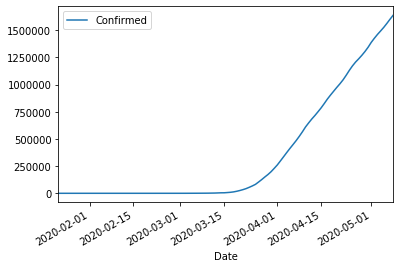

In [61]:
f.plot.line(x="Date",y="Confirmed")

In [563]:
daily_data["daily_frequency"].describe()

count       107.000000
mean      60741.121495
std       40907.739449
min        2741.000000
25%       45517.000000
50%       52276.000000
75%       56081.500000
max      248455.000000
Name: daily_frequency, dtype: float64

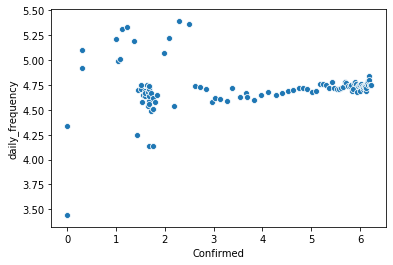

In [67]:
#log-scaled scatterplot
import numpy as np
sns.scatterplot(np.log10(f["Confirmed"]),np.log10(daily_data["daily_frequency"])).set_title("daily_frequency vs COnfirmed")


In [52]:
f["Confirmed"].corr(daily_data["daily_frequency"])

-0.03596061094119991

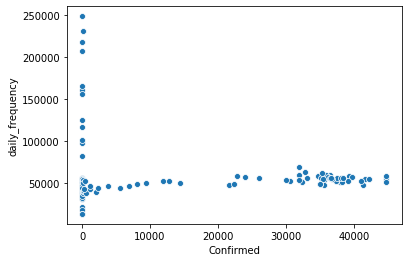

In [71]:
sns.scatterplot(f["Confirmed"].diff(),daily_data["daily_frequency"])

In [147]:
f["Confirmed"]

0            1.0
1            1.0
2            2.0
3            2.0
4           10.0
         ...    
102    1492645.0
103    1525492.0
104    1561950.0
105    1600341.0
106    1636974.0
Name: Confirmed, Length: 107, dtype: float64

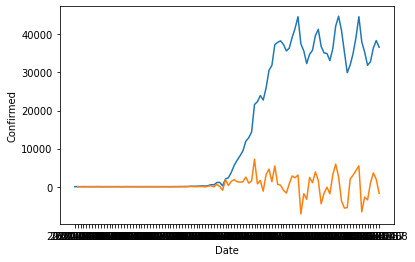

In [83]:
# Overlaid 1-order differencing and 2-order differencing of confirmed covid cases
sns.lineplot(x=f["Date"],y=f["Confirmed"].diff())
sns.lineplot(x=f["Date"],y=(f["Confirmed"].diff()).diff())

C:\Users\acer\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '1-differenced daily_term count')

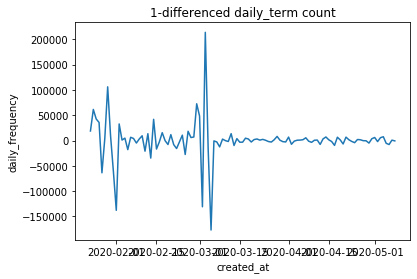

In [5]:
sns.lineplot(x=daily_data["created_at"],y=daily_data["daily_frequency"].diff()).set_title("1-differenced daily_term count")

In [86]:
z=(f["Confirmed"].diff()).diff()
z.corr(daily_data["daily_frequency"].diff())

-0.020496100209461986

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.26452426, 0.27939582, 0.29467722, 0.3104437 , 0.32665436,
        0.34326771, 0.36024231, 0.37756888, 0.3952822 , 0.41338579,
        0.43186628, 0.43157935, 0.43101217, 0.43065509, 0.42750687,
        0.42232077, 0.41953965, 0.41858691, 0.41686849, 0.41717457,
        0.41866546]),
 <matplotlib.lines.Line2D at 0x2476f67c5c8>)

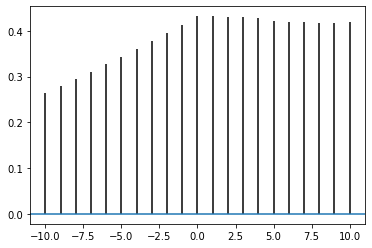

In [96]:
plt.xcorr(f["Confirmed"],daily_data["daily_frequency"])

In [110]:
daily_data["cum_frequency"]=daily_data["daily_frequency"].cumsum()

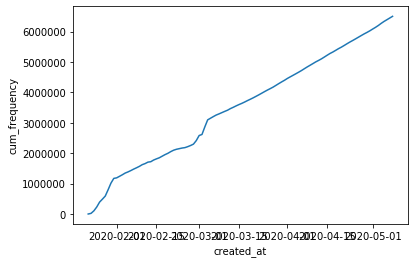

In [112]:
sns.lineplot(y=daily_data["cum_frequency"],x=daily_data["created_at"])

In [113]:
#High correlation between confirmed and Cumulative_term_counts
daily_data["cum_frequency"].corr(f["Confirmed"])

0.8281780247336641

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.51191033, 0.53940049, 0.56758873, 0.59660346, 0.62627149,
        0.65651692, 0.68724621, 0.71847684, 0.75029204, 0.78273268,
        0.8157478 , 0.80773081, 0.79971915, 0.79171802, 0.78372351,
        0.77578745, 0.76794766, 0.76015949, 0.75238902, 0.74465044,
        0.73690618]),
 <matplotlib.lines.Line2D at 0x2476fc7bf88>)

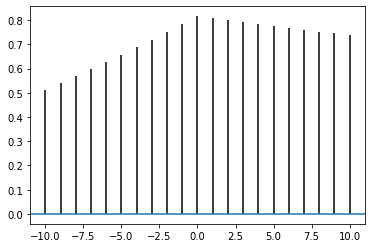

In [114]:
plt.xcorr(f["Confirmed"],daily_data["cum_frequency"])#,detrend(f["Confirmed"]))

In [142]:
f["Confirmed"]

0           0.0
1           0.0
2           0.0
3           0.0
4           4.0
         ...   
961    310836.0
962    311727.0
963    312640.0
964    313470.0
965    314160.0
Name: Confirmed, Length: 966, dtype: float64

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.38932283, 0.39944105, 0.41044887, 0.42347798, 0.43540882,
        0.44622491, 0.45592738, 0.46538156, 0.47576967, 0.48625227,
        0.49637595, 0.49620572, 0.49563504, 0.49460224, 0.4912761 ,
        0.4867586 , 0.48388891, 0.48268866, 0.48128098, 0.48155291,
        0.48140055]),
 <matplotlib.lines.Line2D at 0x247711caf48>)

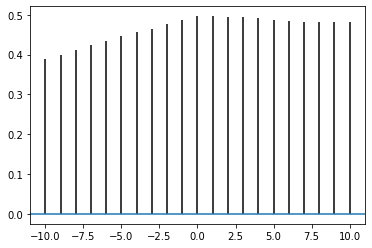

In [155]:
plt.xcorr(a,daily_data["daily_frequency"])

0.8281780247336641

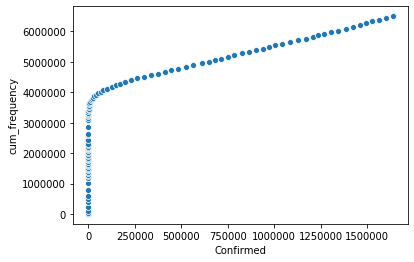

In [175]:
sns.scatterplot(x=daily_data["Confirmed"],y=daily_data["cum_frequency"])
daily_data["Confirmed"].corr(daily_data["cum_frequency"])

In [179]:
daily_data["cum_frequency"].corr(daily_data["Confirmed"])

0.8281780247336641

In [181]:
daily_data

created_at  daily_frequency  cum_frequency  Confirmed
0   2020-01-22             2741           2741        1.0
1   2020-01-23            21535          24276        1.0
2   2020-01-24            82902         107178        2.0
3   2020-01-25           125457         232635        2.0
4   2020-01-26           161112         393747       10.0
..         ...              ...            ...        ...
102 2020-05-04            69114        6268041  1492645.0
103 2020-05-05            63570        6331611  1525492.0
104 2020-05-06            55661        6387272  1561950.0
105 2020-05-07            56398        6443670  1600341.0
106 2020-05-08            55630        6499300  1636974.0

[107 rows x 4 columns]

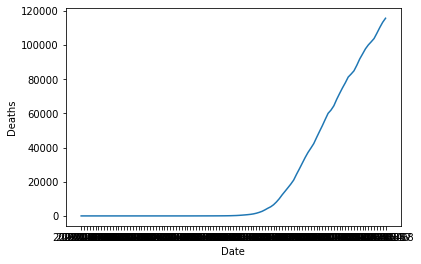

In [185]:
sns.lineplot(x=f["Date"],y=f["Deaths"])

In [ ]:
daily_data["deaths"]=f["Deaths"]

In [188]:
daily_data.rename({"Confirmed":"confirmed"},inplace=True)

In [189]:
daily_data

created_at  daily_frequency  cum_frequency  Confirmed    deaths
0   2020-01-22             2741           2741        1.0       0.0
1   2020-01-23            21535          24276        1.0       0.0
2   2020-01-24            82902         107178        2.0       0.0
3   2020-01-25           125457         232635        2.0       0.0
4   2020-01-26           161112         393747       10.0       0.0
..         ...              ...            ...        ...       ...
102 2020-05-04            69114        6268041  1492645.0  103731.0
103 2020-05-05            63570        6331611  1525492.0  106889.0
104 2020-05-06            55661        6387272  1561950.0  110194.0
105 2020-05-07            56398        6443670  1600341.0  113223.0
106 2020-05-08            55630        6499300  1636974.0  115611.0

[107 rows x 5 columns]

In [197]:
daily_data["daily_deaths"]=daily_data["deaths"].diff()
daily_data["daily_deaths"][0]=0
daily_data

In [203]:
daily_data["daily_cases"]=daily_data["Confirmed"].diff()
daily_data["daily_cases"][0]=1

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'daily term count')

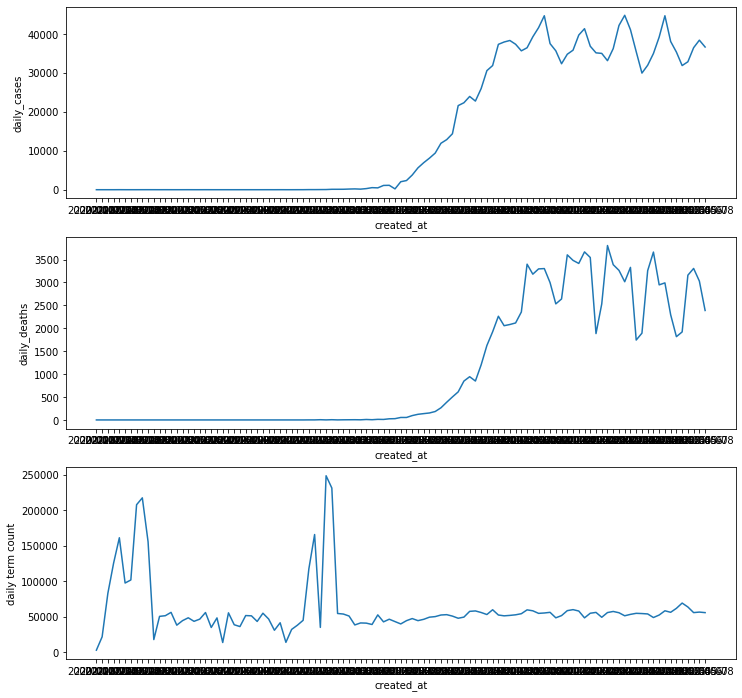

In [394]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize=(12,12))
sns.lineplot(ax=ax1,x=daily_data["created_at"],y=daily_data["daily_cases"])
sns.lineplot(ax=ax2,x=daily_data["created_at"],y=daily_data["daily_deaths"])
g=sns.lineplot(ax=ax3,x=daily_data["created_at"],y=daily_data["daily_frequency"])
g.set_ylabel("daily term count")
#sns.lineplot(ax=ax1,x=daily_data["created_at"],y=daily_data["daily_cases"])


In [ ]:
daily_data.plot.line(x="created_at",y=["daily_cases","daily_deaths","daily_frequency"])

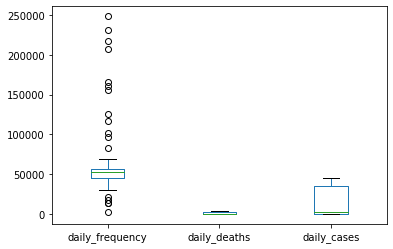

In [223]:
daily_data.plot.box(y=["daily_frequency","daily_deaths","daily_cases"])

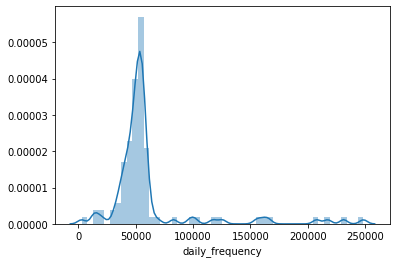

In [227]:
sns.distplot(daily_data["daily_frequency"])

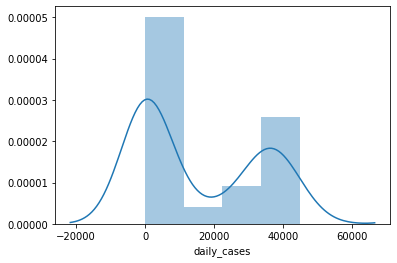

In [228]:
sns.distplot(daily_data["daily_cases"])

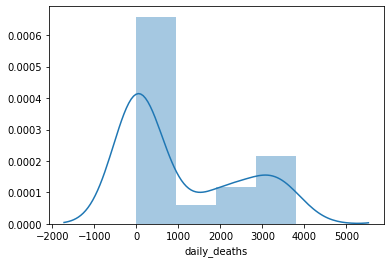

In [229]:
sns.distplot(daily_data["daily_deaths"])

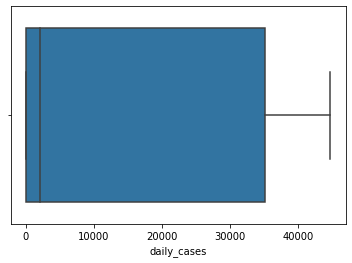

In [230]:
sns.boxplot(daily_data["daily_cases"])

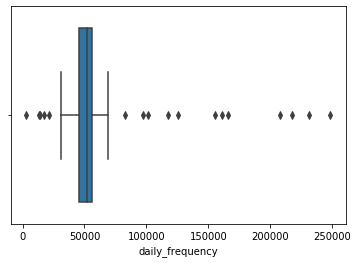

In [231]:
sns.boxplot(daily_data["daily_frequency"])

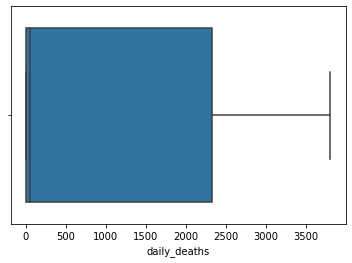

In [233]:
sns.boxplot(daily_data["daily_deaths"])

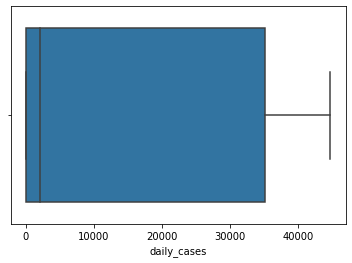

In [321]:
sns.boxplot(daily_data["daily_cases"])

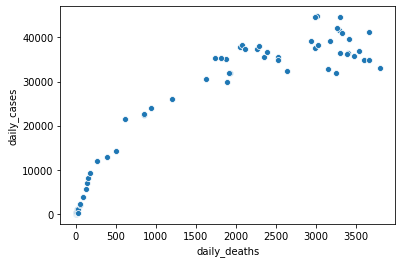

In [234]:
sns.scatterplot(daily_data["daily_deaths"],daily_data["daily_cases"])

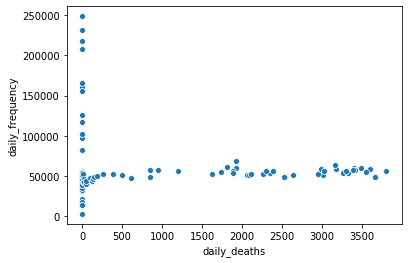

In [236]:
sns.scatterplot(daily_data["daily_deaths"],daily_data["daily_frequency"])

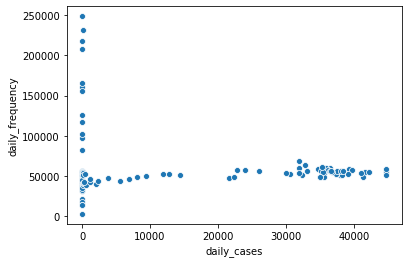

In [237]:
sns.scatterplot(daily_data["daily_cases"],daily_data["daily_frequency"])

In [238]:
daily_data["daily_cases"].corr(daily_data["daily_frequency"])

-0.12905853084101224

0.7973005485418727


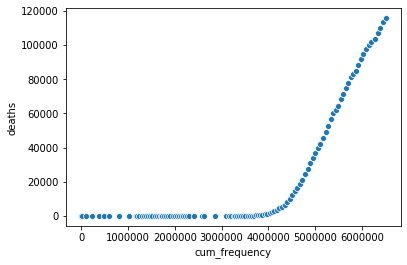

In [240]:
#Deaths vs cumulative frquency of term counts
sns.scatterplot(daily_data["cum_frequency"],daily_data["deaths"])
print(daily_data["cum_frequency"].corr(daily_data["deaths"]))

0.8281780247336641


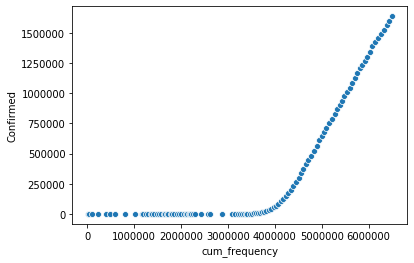

In [241]:
#Confirmed cases vs cumulative frequency of term counts
sns.scatterplot(daily_data["cum_frequency"],daily_data["Confirmed"])
print(daily_data["cum_frequency"].corr(daily_data["Confirmed"]))

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.73690618, 0.74465044, 0.75238902, 0.76015949, 0.76794766,
        0.77578745, 0.78372351, 0.79171802, 0.79971915, 0.80773081,
        0.8157478 , 0.78273268, 0.75029204, 0.71847684, 0.68724621,
        0.65651692, 0.62627149, 0.59660346, 0.56758873, 0.53940049,
        0.51191033]),
 <matplotlib.lines.Line2D at 0x24773f59448>)

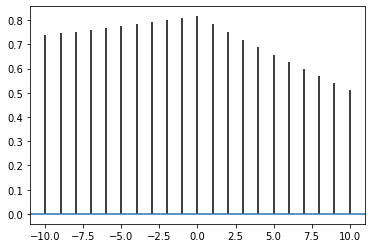

In [242]:
plt.xcorr(daily_data["cum_frequency"],daily_data["Confirmed"])

(array([-4, -3, -2, -1,  0,  1,  2,  3,  4]),
 array([0., 1., 2., 3., 4., 5., 0., 0., 0.]),
 <matplotlib.lines.Line2D at 0x21062804188>)

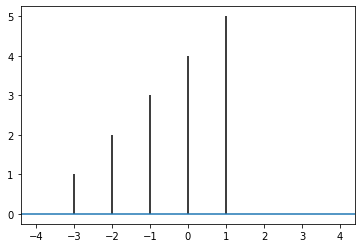

In [9]:
#check working of xcorr
plt.xcorr([1.,2.,3.,4.,5.], [0,0,0,1,0], normed=False, maxlags=4)

(array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
        -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40]),
 array([0.00882266, 0.01113234, 0.01401535, 0.01757583, 0.02193183,
        0.02700076, 0.03278532, 0.03929097, 0.04659827, 0.05508157,
        0.06465046, 0.0753373 , 0.08713447, 0.09991925, 0.11351179,
        0.12794315, 0.14355757, 0.16030011, 0.17813619, 0.19714817,
        0.21727974, 0.23791146, 0.259274  , 0.28182668, 0.30540446,
        0.32995229, 0.35537033, 0.38176311, 0.4085393 , 0.43574869,
        0.4638858 , 0.49308864, 0.52308439, 0.55388056, 0.58521307,
        0.61689876, 0.64896934, 0.68187312, 0.71565532, 0.750

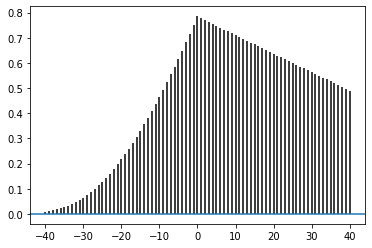

In [590]:
plt.xcorr(daily_data["Deaths"],daily_data["cum_frequency"],maxlags=40)

# Daily Cases Anomaly Detection


In [282]:
t=daily_data[daily_data.columns[1:]]
t

daily_frequency  cum_frequency  Confirmed    deaths  daily_deaths  \
0               2741           2741        1.0       0.0           0.0   
1              21535          24276        1.0       0.0           0.0   
2              82902         107178        2.0       0.0           0.0   
3             125457         232635        2.0       0.0           0.0   
4             161112         393747       10.0       0.0           0.0   
..               ...            ...        ...       ...           ...   
102            69114        6268041  1492645.0  103731.0        1920.0   
103            63570        6331611  1525492.0  106889.0        3158.0   
104            55661        6387272  1561950.0  110194.0        3305.0   
105            56398        6443670  1600341.0  113223.0        3029.0   
106            55630        6499300  1636974.0  115611.0        2388.0   

     daily_cases  
0            1.0  
1            0.0  
2            1.0  
3            0.0  
4            8.0  
..           ...  
102      31874.0  
103      32847.0  
104      36458.0  
105      38391.0  
106      36633.0  

[107 rows x 6 columns]

In [23]:
from sklearn.ensemble import IsolationForest

In [24]:
clf=IsolationForest(max_features=3,n_estimators=10,contamination=0.1)
clf

IsolationForest(behaviour='old', bootstrap=False, contamination=0.1,
                max_features=3, max_samples='auto', n_estimators=10,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [470]:
t1=daily_data[daily_data.columns[[0,1,5,6]]]

In [68]:

#daily_data.drop(daily_data.columns[-2:],axis=1,inplace=True)
daily_data.iloc[:40]["Deaths"]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    1.0
38    2.0
39    7.0
Name: Deaths, dtype: float64

In [471]:
clf.fit_predict(t1[t1.columns[1:]])

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1,  1, -1])

In [39]:
daily_data.drop("Recovered",axis=1,inplace=True)
daily_data

created_at  daily_frequency  Confirmed    Deaths  daily_cases  \
0   2020-01-22             2741        1.0       0.0          1.0   
1   2020-01-23            21535        1.0       0.0          0.0   
2   2020-01-24            82902        2.0       0.0          1.0   
3   2020-01-25           125457        2.0       0.0          0.0   
4   2020-01-26           161112       10.0       0.0          8.0   
..         ...              ...        ...       ...          ...   
102 2020-05-04            69114  1492645.0  103731.0      31874.0   
103 2020-05-05            63570  1525492.0  106889.0      32847.0   
104 2020-05-06            55661  1561950.0  110194.0      36458.0   
105 2020-05-07            56398  1600341.0  113223.0      38391.0   
106 2020-05-08            55630  1636974.0  115611.0      36633.0   

     daily_deaths  cum_frequency  
0             0.0           2741  
1             0.0          24276  
2             0.0         107178  
3             0.0         232635  
4             0.0         393747  
..            ...            ...  
102        1920.0        6268041  
103        3158.0        6331611  
104        3305.0        6387272  
105        3029.0        6443670  
106        2388.0        6499300  

[107 rows x 7 columns]

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler=StandardScaler()
#pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=5))])
n_data=scaler.fit_transform(daily_data[daily_data.columns[1:]])

In [41]:
n_data=pd.DataFrame(n_data)
n_data

0         1         2         3         4         5
0   -1.424500 -0.688656 -0.638389 -0.884117 -0.787603 -1.950986
1   -0.962914 -0.688656 -0.638389 -0.884175 -0.787603 -1.938993
2    0.544278 -0.688654 -0.638389 -0.884117 -0.787603 -1.892826
3    1.589441 -0.688654 -0.638389 -0.884175 -0.787603 -1.822960
4    2.465138 -0.688638 -0.638389 -0.883712 -0.787603 -1.733238
..        ...       ...       ...       ...       ...       ...
102  0.205640  2.232801  2.284433  0.957940  0.611962  1.538116
103  0.069478  2.297090  2.373416  1.014173  1.514390  1.573518
104 -0.124769  2.368447  2.466540  1.222866  1.621544  1.604515
105 -0.106668  2.443588  2.551888  1.334581  1.420357  1.635923
106 -0.125531  2.515287  2.619175  1.232980  0.953106  1.666903

[107 rows x 6 columns]

In [42]:
n_data.mean()

0   -6.744345e-17
1   -6.640586e-17
2   -2.158191e-16
3   -4.772921e-17
4   -5.602995e-17
5   -2.718490e-16
dtype: float64

In [43]:
#huge difference in variance of columns, hence standardisation
daily_data[daily_data.columns[-6:]].var()

daily_frequency    1.673443e+09
Confirmed          2.635065e+11
Deaths             1.271424e+09
daily_cases        3.022163e+08
daily_deaths       1.899740e+06
cum_frequency      3.254875e+12
dtype: float64

In [44]:
from sklearn.neighbors import LocalOutlierFactor
odf=LocalOutlierFactor(n_neighbors=15,p=3)

In [50]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=1)
model.fit(daily_data[daily_data.columns[-6:]])

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [83]:
from sklearn.decomposition import PCA
pca = PCA(2)
labels=odf.fit_predict(n_data)#daily_data[daily_data.columns[-6:]])
labels
trans=pca.fit_transform(n_data)
trans=pd.DataFrame(trans)
trans["labels"]=pd.Series(labels)
trans
out_idx=trans[trans["labels"]==-1].index
out_idx

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Int64Index([3, 4, 5, 6, 7, 8, 9, 37, 38, 40, 41], dtype='int64')

In [81]:
print("Outliers identified by DBSCAN")
daily_data.loc[out_idx]

Outliers identified by DBSCAN


created_at  daily_frequency  Confirmed  Deaths  daily_cases  daily_deaths  \
7  2020-01-29           207654       13.0     0.0          1.0           0.0   
8  2020-01-30           217326       17.0     0.0          4.0           0.0   
37 2020-02-29           117361       96.0     1.0         27.0           1.0   
38 2020-03-01           165666      121.0     2.0         25.0           1.0   
40 2020-03-03           248455      199.0     8.0         43.0           1.0   
41 2020-03-04           231168      306.0    13.0        107.0           5.0   

    cum_frequency  
7          800394  
8         1017720  
37        2416516  
38        2582182  
40        2865468  
41        3096636

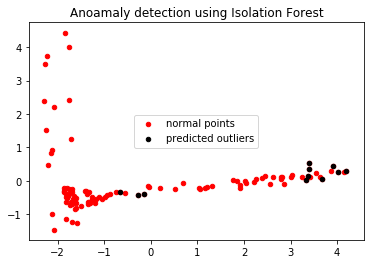

In [74]:
b1 = plt.scatter(trans[0], trans[1], c='red',
                 s=20,label="normal points")
b1 =plt.scatter(trans.iloc[out_idx,0],trans.iloc[out_idx,1], c='black',s=20,label="predicted outliers")
plt.title("Anoamaly detection using Isolation Forest")
plt.legend(loc="center")
plt.show()

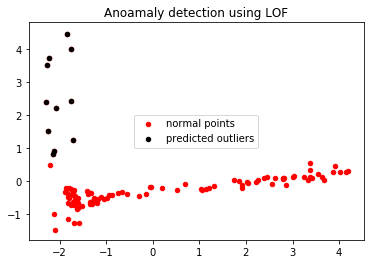

In [76]:
b1 = plt.scatter(trans[0], trans[1], c='red',
                 s=20,label="normal points")
b1 =plt.scatter(trans.iloc[out_idx,0],trans.iloc[out_idx,1], c='black',s=20,label="predicted outliers")
plt.title("Anoamaly detection using LOF")
plt.legend(loc="center")
plt.show()

In [91]:
# negative outlier factor scores using odf
scores=odf.negative_outlier_factor_
scores[out_idx]

array([-3.30738715, -3.02564413, -2.88598411, -2.95016754, -3.59766674,
       -3.73954204, -2.9650897 , -2.9933592 , -3.11452894, -3.28262636,
       -3.53807131])

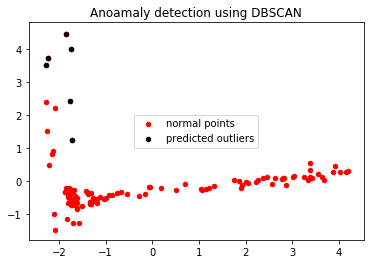

In [79]:
b1 = plt.scatter(trans[0], trans[1], c='red',
                 s=20,label="normal points")
b1 =plt.scatter(trans.iloc[out_idx,0],trans.iloc[out_idx,1], c='black',s=20,label="predicted outliers")
plt.title("Anoamaly detection using DBSCAN")
plt.legend(loc="center")
plt.show()

In [48]:
#Outliers identified by LOF
daily_data.loc[out_idx,]

created_at  daily_frequency  Confirmed  Deaths  daily_cases  daily_deaths  \
3  2020-01-25           125457        2.0     0.0          0.0           0.0   
4  2020-01-26           161112       10.0     0.0          8.0           0.0   
5  2020-01-27            97343       11.0     0.0          1.0           0.0   
6  2020-01-28           101650       12.0     0.0          1.0           0.0   
7  2020-01-29           207654       13.0     0.0          1.0           0.0   
8  2020-01-30           217326       17.0     0.0          4.0           0.0   
9  2020-01-31           155520       23.0     0.0          6.0           0.0   
37 2020-02-29           117361       96.0     1.0         27.0           1.0   
38 2020-03-01           165666      121.0     2.0         25.0           1.0   
40 2020-03-03           248455      199.0     8.0         43.0           1.0   
41 2020-03-04           231168      306.0    13.0        107.0           5.0   

    cum_frequency  
3          232635  
4          393747  
5          491090  
6          592740  
7          800394  
8         1017720  
9         1173240  
37        2416516  
38        2582182  
40        2865468  
41        3096636

In [62]:
daily_data.iloc[20]

created_at         2020-02-11 00:00:00
daily_frequency                  34733
Confirmed                           45
Deaths                               0
daily_cases                          1
daily_deaths                         0
cum_frequency                  1659617
Name: 20, dtype: object

In [95]:
t1_=daily_data[~daily_data.index.isin(out_idx)]

In [97]:
#correlations after removing outlier
print(t1_["daily_frequency"].corr(t1_["daily_deaths"]))
print(t1_["daily_frequency"].corr(t1_["daily_cases"]))

0.485623678086578
0.5250668446295176


# Term Analysis

In [98]:
#Analysis of different outbreak and symptom terms
import pandas as pd
df_terms=pd.read_csv("D:\spotle_intern\d_more_termwise.csv")
df_terms.fillna(0,inplace=True)

df_terms["covid"]=df_terms["covid19"]+df_terms["covid 19"]+df_terms["covid"]
df_terms.drop(["covid19","covid 19"],axis=1,inplace=True)
df_terms["facial_mask"]=df_terms["facial_mask"]+df_terms["psa_facial_mask"]+df_terms["psa"]
df_terms.drop(["psa_facial_mask","psa"],axis=1,inplace=True)
df_terms=df_terms.sort_values("created_at")


In [99]:
df_terms=df_terms.reset_index(drop=True)
df_terms

created_at  china  corona  wuhan  pandemic  lockdown  spread  \
0    2020-01-22    721      29    746        16       0.0     273   
1    2020-01-23   5482     209   9596       104    1225.0    1703   
2    2020-01-24  25626    1364  34392       739    3127.0    6050   
3    2020-01-25  36262    4502  47046      1168    3372.0   11069   
4    2020-01-26  51900    3109  53294      1997    3721.0   22940   
..          ...    ...     ...    ...       ...       ...     ...   
102  2020-05-04   4051    3641   1473      9425   11909.0    1799   
103  2020-05-05   2084    3011   1286     13861    9104.0    1544   
104  2020-05-06   1866    2516    760      8391    9818.0    1243   
105  2020-05-07   1667    2817    591      8019   12746.0    1301   
106  2020-05-08   1776    2708    548      8033   10206.0    1295   

     coronavirus    covid  coronavirus_outbreak  ...  facial_mask  wuhanvirus  \
0             13      0.0                    25  ...          3.0          21   
1            141      0.0                   911  ...          7.0          46   
2           1037      0.0                  4954  ...         31.0         883   
3           3768      0.0                  9266  ...         37.0        1036   
4           1828      0.0                  7367  ...         39.0         578   
..           ...      ...                   ...  ...          ...         ...   
102          614  27937.0                   375  ...          9.0          25   
103          556  26359.0                   312  ...         12.0          16   
104          485  24947.0                   227  ...         14.0          28   
105          826  23434.0                   237  ...         18.0          20   
106          588  23420.0                   164  ...         39.0          22   

     chinavirus  symptomatic  respiratory illness  headache  sore throat  \
0            14          0.0                  7.0       0.0          0.0   
1            44          1.0                 29.0       2.0          3.0   
2           125          1.0                 37.0      10.0         13.0   
3           126          8.0                 37.0      17.0         36.0   
4           121        666.0                171.0      22.0         34.0   
..          ...          ...                  ...       ...          ...   
102          47         18.0                  8.0      13.0          1.0   
103          13         13.0                  3.0       9.0          4.0   
104          20          8.0                  7.0      16.0          1.0   
105          24          7.0                  1.0       4.0         17.0   
106          50         11.0                  2.0       5.0          3.0   

     runny nose  respiratory virus  merscov  
0           3.0                1.0      2.0  
1           3.0               12.0     13.0  
2           8.0              111.0     23.0  
3          20.0                9.0    153.0  
4          27.0              151.0     46.0  
..          ...                ...      ...  
102         0.0                4.0      0.0  
103         0.0               55.0      3.0  
104         0.0                8.0      0.0  
105         0.0                3.0      0.0  
106         0.0                5.0      0.0  

[107 rows x 27 columns]

In [33]:
#daily_data.drop("Recovered",axis=1,inplace=True)
#daily_data

created_at  daily_frequency  Confirmed    Deaths  daily_cases  \
0   2020-01-22             2741        1.0       0.0          1.0   
1   2020-01-23            21535        1.0       0.0          0.0   
2   2020-01-24            82902        2.0       0.0          1.0   
3   2020-01-25           125457        2.0       0.0          0.0   
4   2020-01-26           161112       10.0       0.0          8.0   
..         ...              ...        ...       ...          ...   
102 2020-05-04            69114  1492645.0  103731.0      31874.0   
103 2020-05-05            63570  1525492.0  106889.0      32847.0   
104 2020-05-06            55661  1561950.0  110194.0      36458.0   
105 2020-05-07            56398  1600341.0  113223.0      38391.0   
106 2020-05-08            55630  1636974.0  115611.0      36633.0   

     daily_deaths  cum_frequency  
0             0.0           2741  
1             0.0          24276  
2             0.0         107178  
3             0.0         232635  
4             0.0         393747  
..            ...            ...  
102        1920.0        6268041  
103        3158.0        6331611  
104        3305.0        6387272  
105        3029.0        6443670  
106        2388.0        6499300  

[107 rows x 7 columns]

In [100]:
df_terms=pd.concat([df_terms,daily_data[daily_data.columns[1:]]],axis=1)

In [101]:
df_terms

created_at  china  corona  wuhan  pandemic  lockdown  spread  \
0    2020-01-22    721      29    746        16       0.0     273   
1    2020-01-23   5482     209   9596       104    1225.0    1703   
2    2020-01-24  25626    1364  34392       739    3127.0    6050   
3    2020-01-25  36262    4502  47046      1168    3372.0   11069   
4    2020-01-26  51900    3109  53294      1997    3721.0   22940   
..          ...    ...     ...    ...       ...       ...     ...   
102  2020-05-04   4051    3641   1473      9425   11909.0    1799   
103  2020-05-05   2084    3011   1286     13861    9104.0    1544   
104  2020-05-06   1866    2516    760      8391    9818.0    1243   
105  2020-05-07   1667    2817    591      8019   12746.0    1301   
106  2020-05-08   1776    2708    548      8033   10206.0    1295   

     coronavirus    covid  coronavirus_outbreak  ...  sore throat  runny nose  \
0             13      0.0                    25  ...          0.0         3.0   
1            141      0.0                   911  ...          3.0         3.0   
2           1037      0.0                  4954  ...         13.0         8.0   
3           3768      0.0                  9266  ...         36.0        20.0   
4           1828      0.0                  7367  ...         34.0        27.0   
..           ...      ...                   ...  ...          ...         ...   
102          614  27937.0                   375  ...          1.0         0.0   
103          556  26359.0                   312  ...          4.0         0.0   
104          485  24947.0                   227  ...          1.0         0.0   
105          826  23434.0                   237  ...         17.0         0.0   
106          588  23420.0                   164  ...          3.0         0.0   

     respiratory virus  merscov  daily_frequency  Confirmed    Deaths  \
0                  1.0      2.0             2741        1.0       0.0   
1                 12.0     13.0            21535        1.0       0.0   
2                111.0     23.0            82902        2.0       0.0   
3                  9.0    153.0           125457        2.0       0.0   
4                151.0     46.0           161112       10.0       0.0   
..                 ...      ...              ...        ...       ...   
102                4.0      0.0            69114  1492645.0  103731.0   
103               55.0      3.0            63570  1525492.0  106889.0   
104                8.0      0.0            55661  1561950.0  110194.0   
105                3.0      0.0            56398  1600341.0  113223.0   
106                5.0      0.0            55630  1636974.0  115611.0   

     daily_cases  daily_deaths  cum_frequency  
0            1.0           0.0           2741  
1            0.0           0.0          24276  
2            1.0           0.0         107178  
3            0.0           0.0         232635  
4            8.0           0.0         393747  
..           ...           ...            ...  
102      31874.0        1920.0        6268041  
103      32847.0        3158.0        6331611  
104      36458.0        3305.0        6387272  
105      38391.0        3029.0        6443670  
106      36633.0        2388.0        6499300  

[107 rows x 33 columns]

In [163]:
for i in df_terms.columns[1:-6]:
    print("correlation between {} and {} is : {}".format(i,"infection",df_terms[i].corr(df_terms["daily_cases"])))
    

correlation between china and infection is : -0.46938927578219447
correlation between corona and infection is : -0.2793840553610333
correlation between wuhan and infection is : -0.35877685600176634
correlation between pandemic and infection is : 0.852716483241611
correlation between lockdown and infection is : 0.9245646948324233
correlation between spread and infection is : -0.3747290467854233
correlation between coronavirus and infection is : -0.37778524531116886
correlation between covid and infection is : 0.572184157836308
correlation between coronavirus_outbreak and infection is : -0.5203412620320215
correlation between flu and infection is : -0.298020264212439
correlation between stay_home and infection is : 0.7912574459690066
correlation between social_distance and infection is : 0.6909988806199574
correlation between coronavirus_case and infection is : -0.4113584659509523
correlation between novel_coronavirus and infection is : -0.3717462286635811
correlation between cough and i

# Infection Rate Analysis

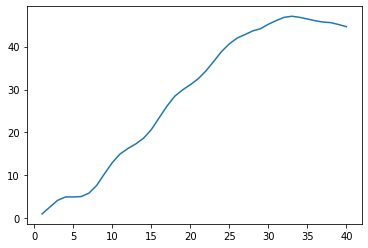

In [102]:
variograph(df_terms["daily_cases"],40)


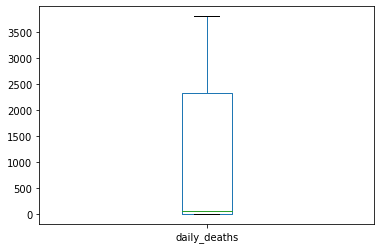

In [103]:
df_terms.plot.box(y="daily_deaths")

In [104]:
df_terms["daily_deaths"].describe()

count     107.000000
mean     1080.476636
std      1378.310542
min         0.000000
25%         0.000000
50%        54.000000
75%      2325.000000
max      3805.000000
Name: daily_deaths, dtype: float64

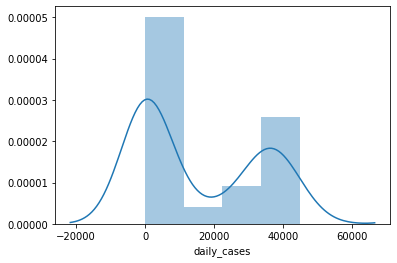

In [558]:
sns.distplot(df_terms["daily_cases"])

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


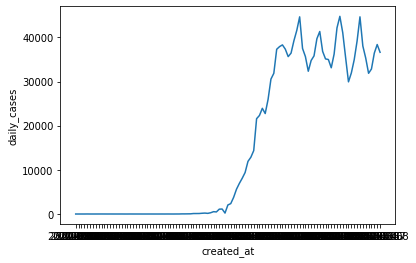

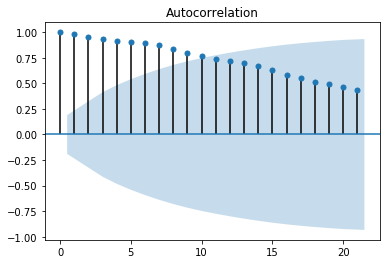

In [105]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
sns.lineplot(df_terms["created_at"],df_terms["daily_cases"])
plot_acf(df_terms["daily_cases"]).show()
#plot_pacf(df_terms["daily_cases"],)


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


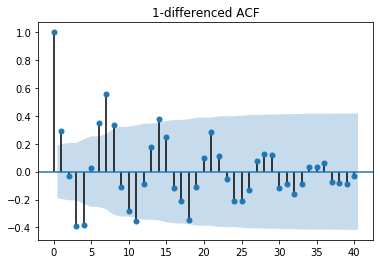

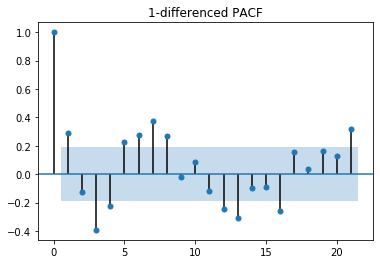

In [340]:
plot_acf(df_terms["daily_cases"].diff()[1:],lags=40,title="1-differenced ACF").show()
plot_pacf(df_terms["daily_cases"].diff()[1:],title="1-differenced PACF").show()

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


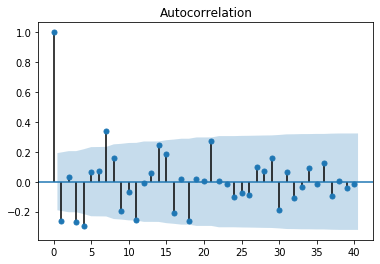

In [109]:
plot_acf((df_terms["daily_cases"].diff()).diff()[2:],lags=40).show()
#plot_pacf((df_terms["daily_cases"].diff()).diff()[2:],lags=30).show()

# Mortality Analysis

In [514]:
df_terms["deaths"]

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
102    103731.0
103    106889.0
104    110194.0
105    113223.0
106    115611.0
Name: deaths, Length: 107, dtype: float64

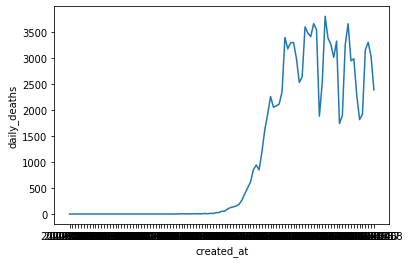

In [516]:
sns.lineplot(x=df_terms["created_at"],y=df_terms["daily_deaths"])

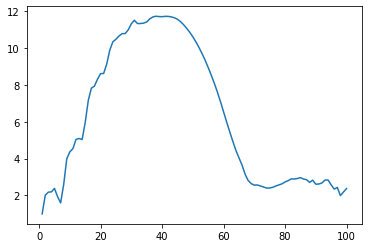

In [355]:
variograph(df_terms["daily_deaths"],100)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


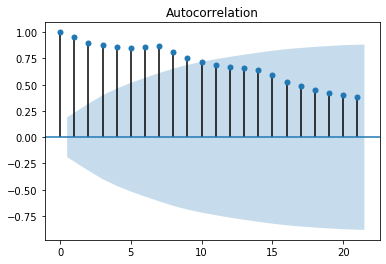

In [347]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_terms["daily_deaths"]).show()

Text(0, 0.5, 'daily_deaths_differenced')

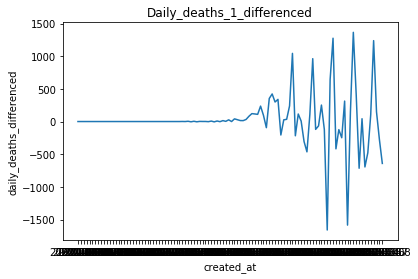

In [370]:
g=sns.lineplot(x=df_terms["created_at"][1:],y=df_terms["daily_deaths"].diff()[1:])#
g.set_title("Daily_deaths_1_differenced")#.ylabel("a")
g.set_ylabel("daily_deaths_differenced")

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


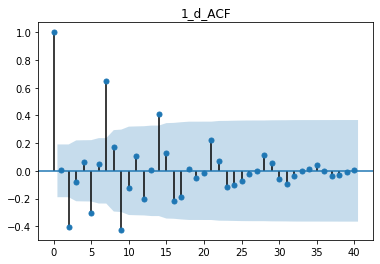

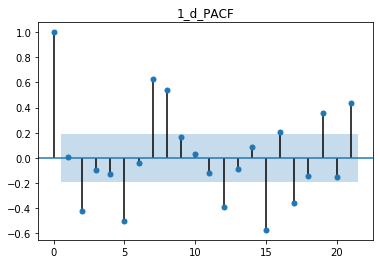

In [434]:
plot_acf(df_terms["daily_deaths"].diff()[1:],lags=40,title="1_d_ACF").show()
plot_pacf(df_terms["daily_deaths"].diff()[1:],title="1_d_PACF",method='ols').show()

Text(0.5, 1.0, 'differenced_Variograph')

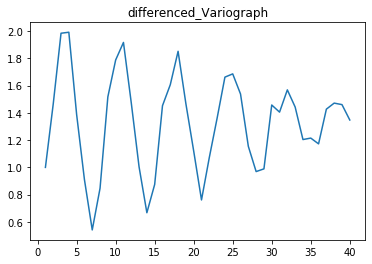

In [110]:

variograph(df_terms["daily_cases"].diff()[1:],40)
plt.title("1-differenced_Variograph")

In [680]:
df_terms.columns[1:-6]

Index(['china', 'corona', 'wuhan', 'pandemic', 'lockdown', 'spread',
       'coronavirus', 'covid', 'coronavirus_outbreak', 'flu', 'stay_home',
       'social_distance', 'coronavirus_case', 'novel_coronavirus', 'cough',
       'fever', 'facial_mask', 'wuhanvirus', 'chinavirus', 'symptomatic',
       'respiratory illness', 'headache', 'sore throat', 'runny nose',
       'respiratory virus', 'merscov'],
      dtype='object')

In [111]:
def create_corr(df,y,lag_c=30,lag_d=30):
    #g1=plt.xcorr(df_terms["daily_cases"],df_terms[y],"full",maxlags=30)[-1]
    #g1.title("cross_correlation between daily_cases and china")
    #print(g1)
    fig,ax=plt.subplots(nrows=2,ncols=1)
    ax[1].xcorr(df["daily_deaths"],df[y],"full",maxlags=lag_d)#[-1]
    #print(g2)
    ax[1].set_title("cross-correlation between daily_deaths and {}".format(y))
    #ax[1].show(False)
    ax[0].xcorr(df["daily_cases"],df[y],"full",maxlags=lag_c)#[-1]  
    ax[0].set_title("cross-correlation between daily_cases and {}".format(y))
    #plt.xcorr
    fig.subplots_adjust(hspace=1)
    fig.show(False)
    return fig

#g2=plt.xcorr(df_terms["daily_deaths"],df_terms["china"],"full",maxlags=30)[-1]
#g2    #print(g2)g2

In [112]:
def tsa_plots(df,ax,linewidth,fig=None,row=None,col=None,size_p=17,size_l=26,size_ax=23,size_t=25,start=1,end=-6,xcol="created_at"):
    #row=9
    #col=3
    
    c=0
    l=df.columns[start:end]
    
    for i in range(0,row):

     for j in  range(0,col):
        try:
            term=l[c]
            df.plot.line(x=xcol,y=["daily_cases","daily_deaths",term],ax=ax[i,j],title=term,fontsize=size_p,linewidth=linewidth)#,prop={'size':6})#,data=df_terms)
            ax[i,j].legend(prop={'size':size_l})
            ax[i,j].xaxis.get_label().set_fontsize(size_ax)
            ax[i,j].title.set_fontsize(size_t)
            c+=1
        except :
            break
    

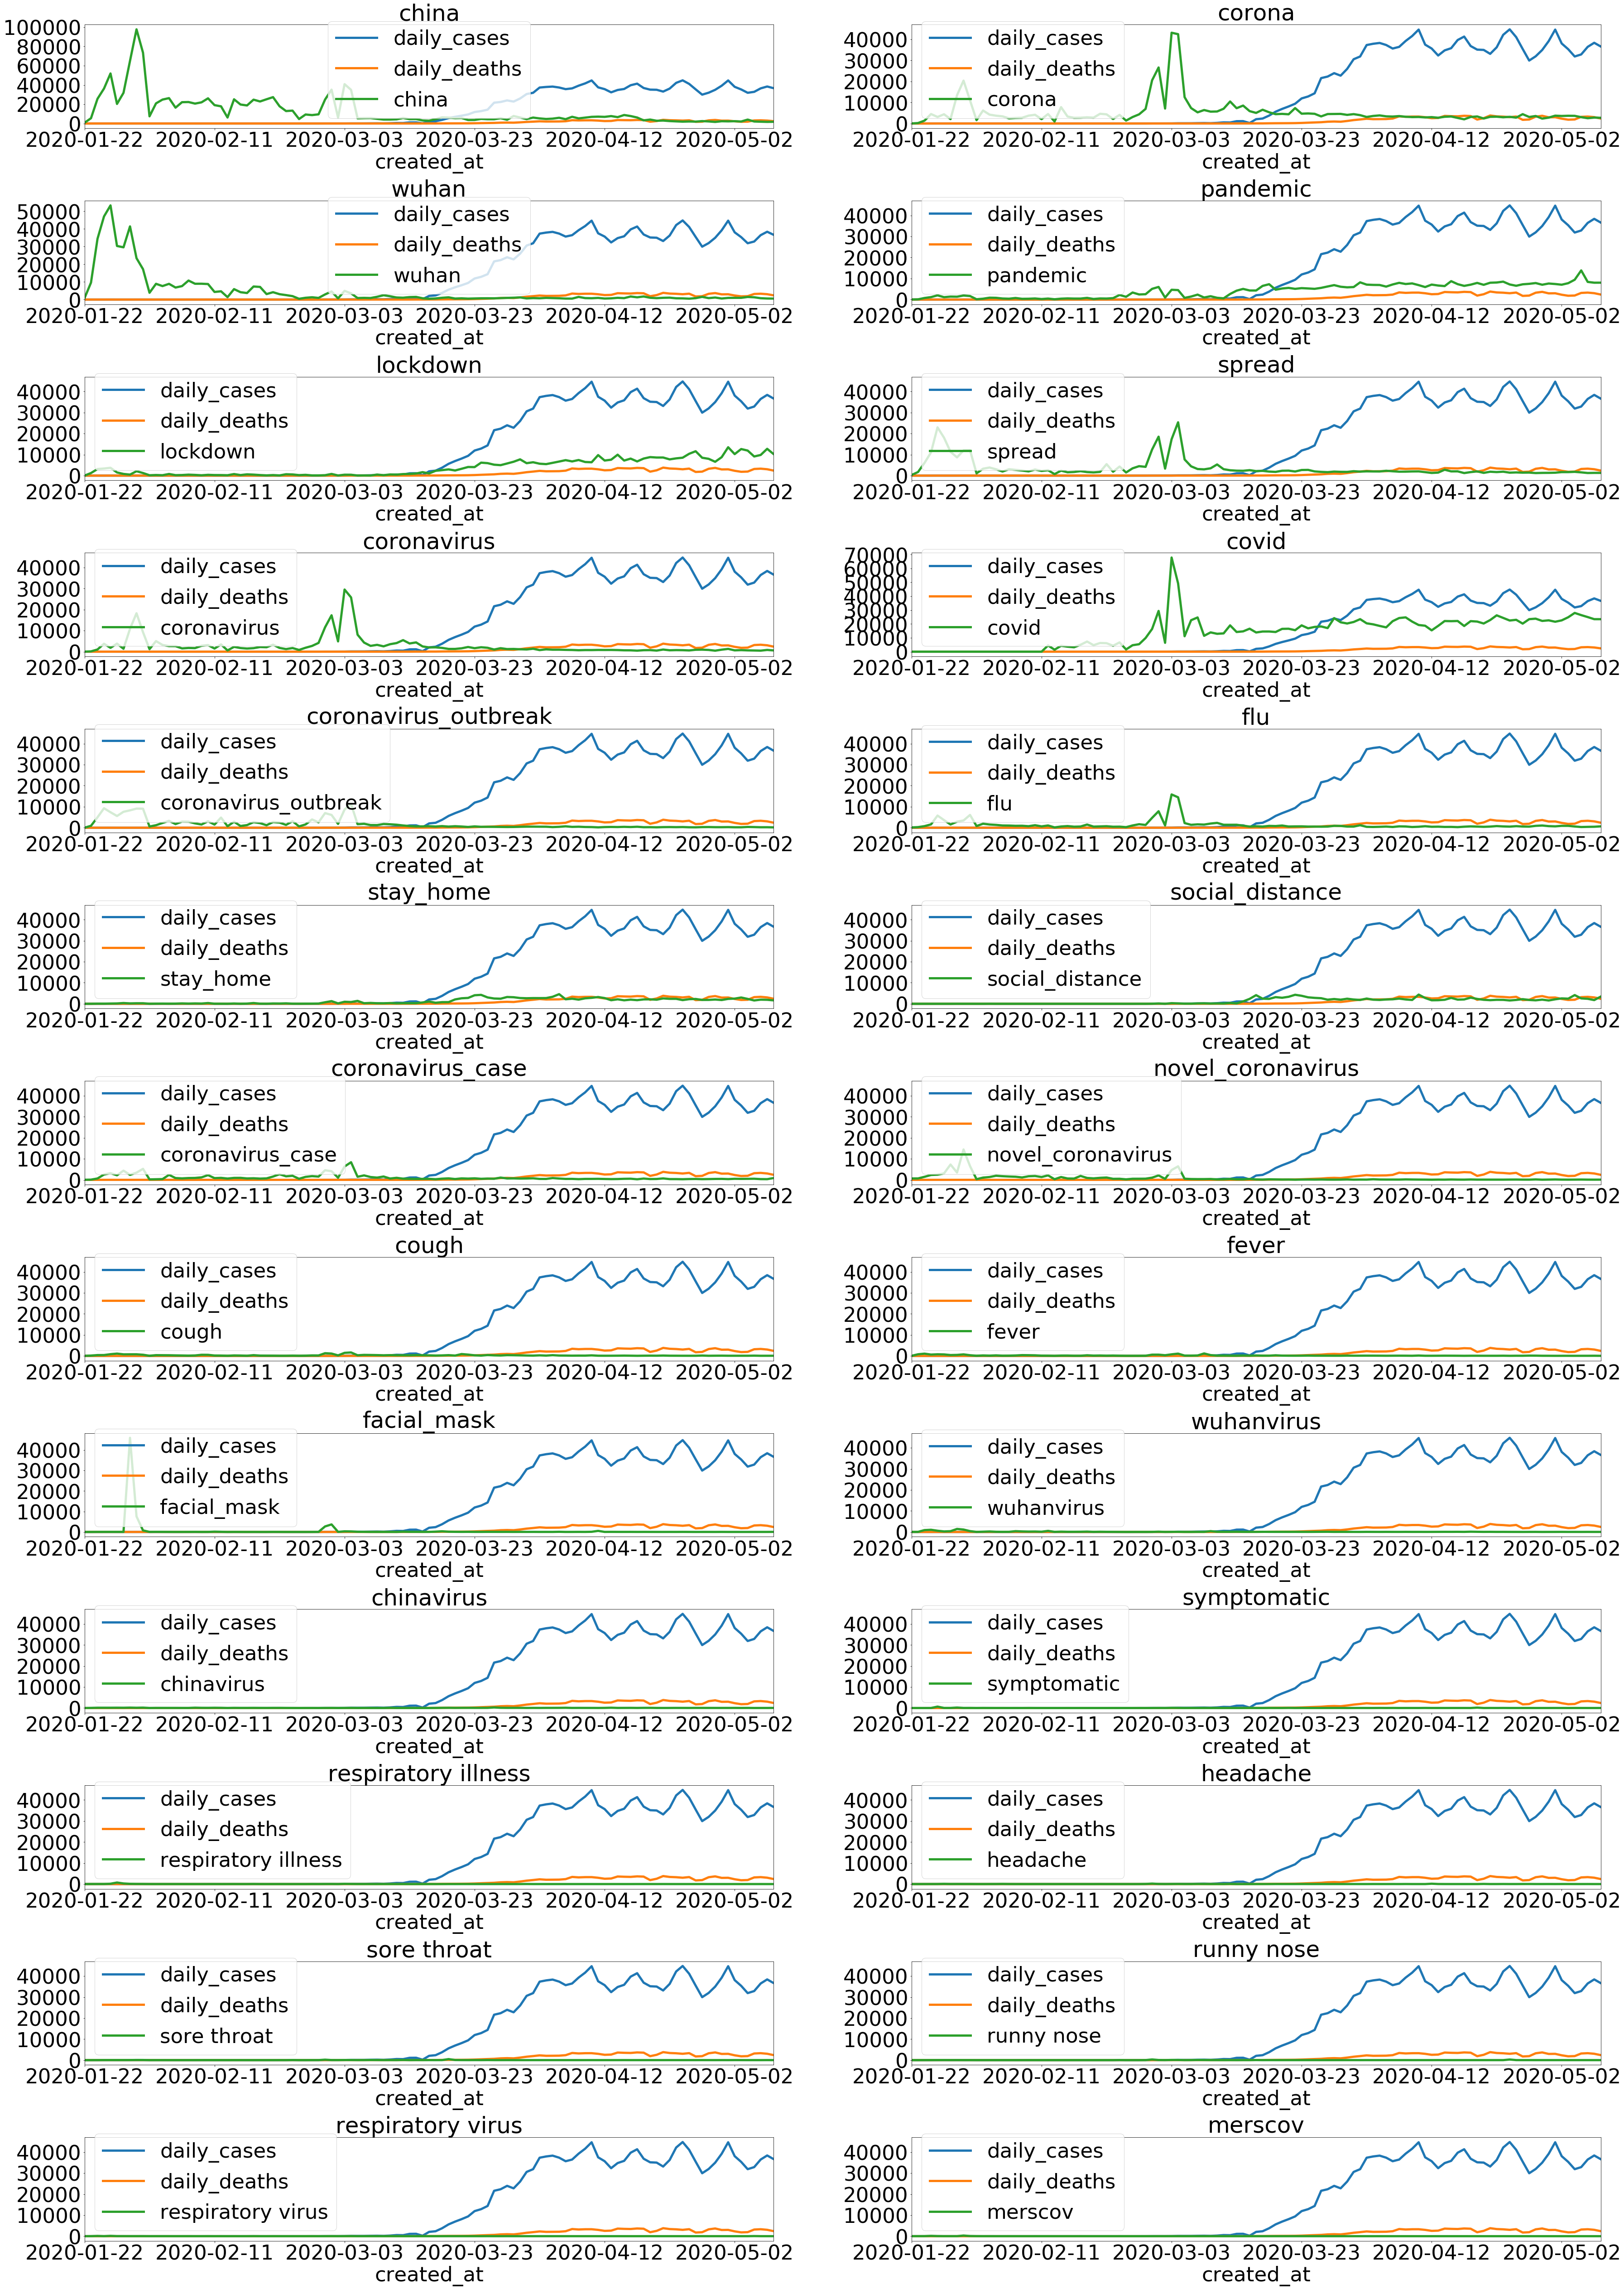

In [126]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=13,ncols=2,figsize=(60,90))
fig.subplots_adjust(hspace=0.7)
tsa_plots(df_terms,fig=fig,row=13,col=2,ax=ax,size_p=45,size_t=50,size_ax=45,size_l=45,linewidth=5,start=1,end=-6)
#fig.set_size_inches((100,100))
#ax[-1,-1].axis("off")

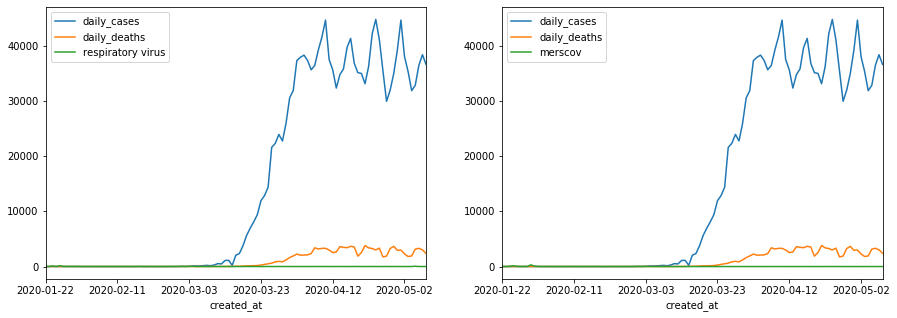

In [312]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig.subplots_adjust(hspace=0.4)
c=0
for i in df_terms.columns[25:-6]:
    df_terms.plot.line(x="created_at",y=["daily_cases","daily_deaths",i],ax=ax[c])
    c+=1

In [234]:
fig.savefig("D:\spotle_intern\img1.jpeg",dpi=199)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


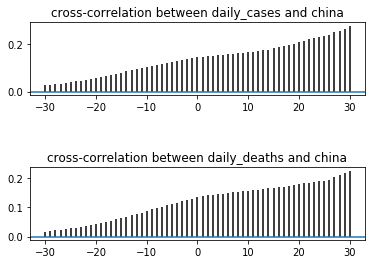

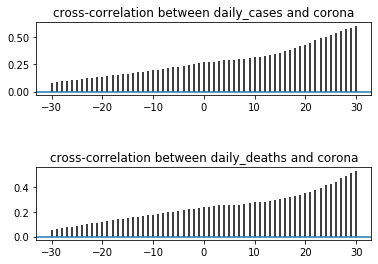

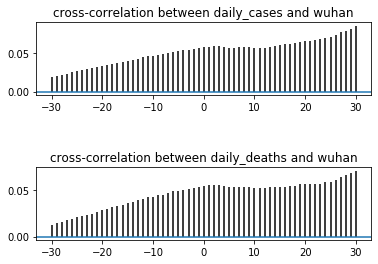

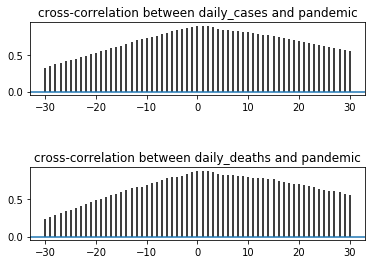

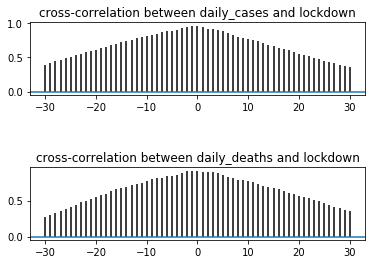

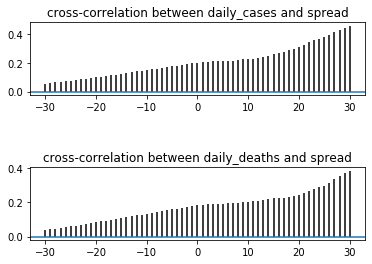

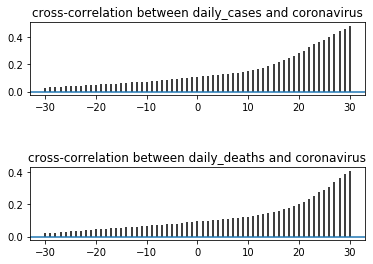

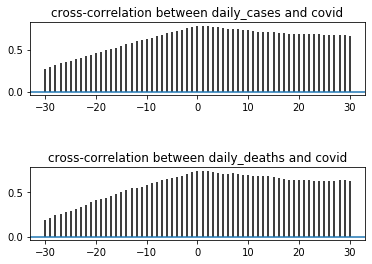

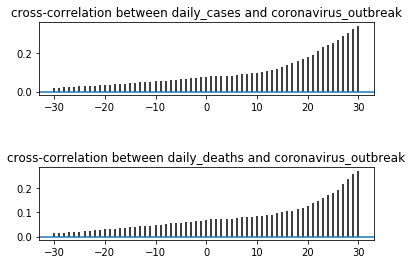

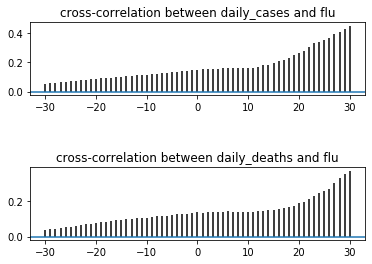

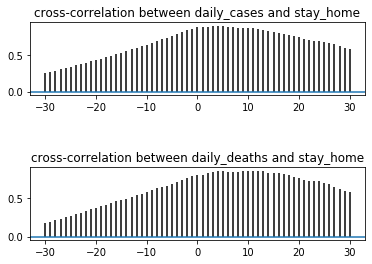

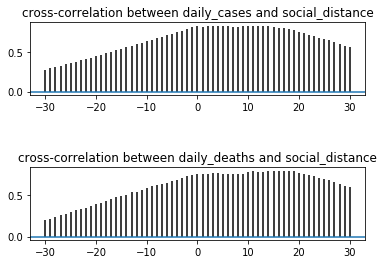

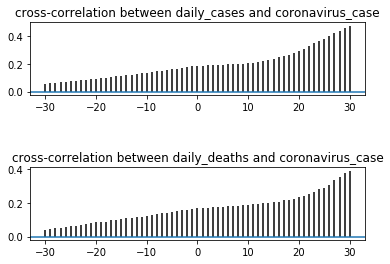

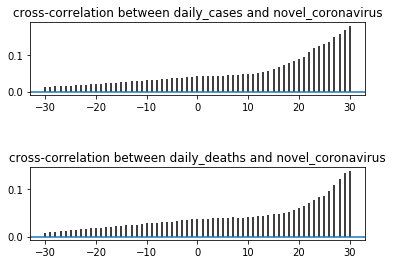

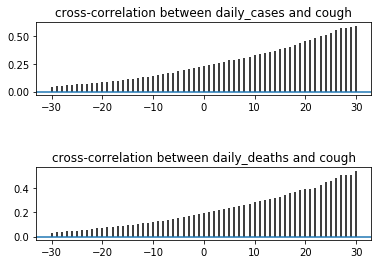

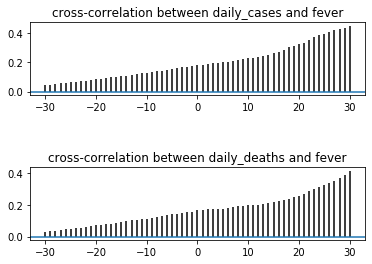

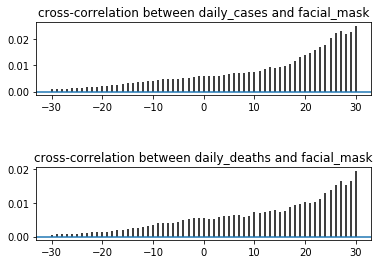

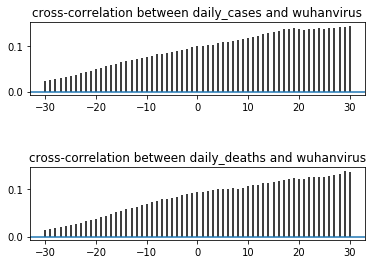

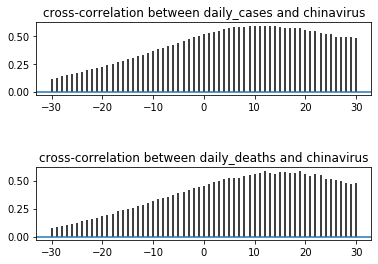

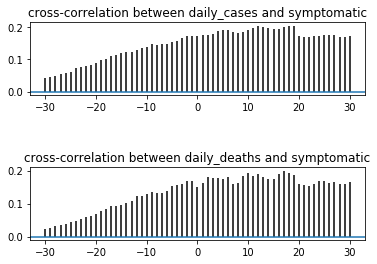

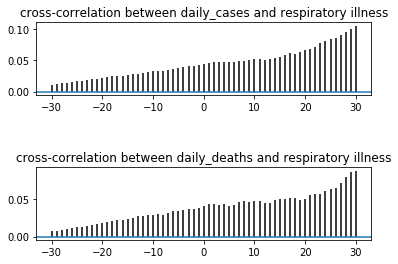

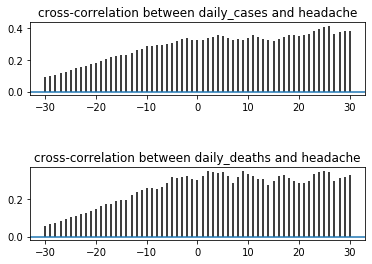

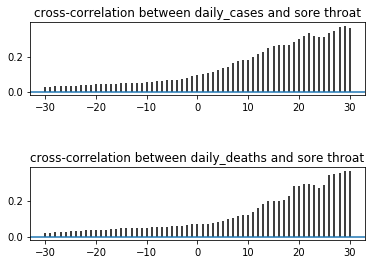

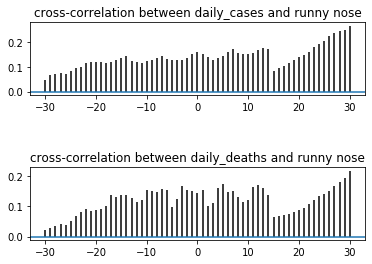

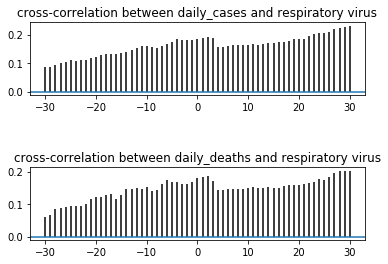

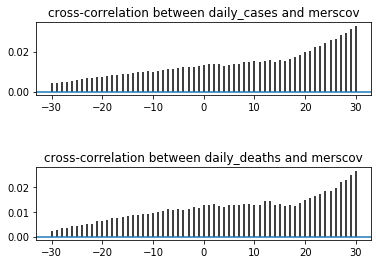

In [114]:
for i in df_terms.columns[1:-6]:
    create_corr(df_terms,i)

In [615]:
len(df_terms.columns[1:-6])

26

In [117]:
def clubbed_df(df,new_df,cols,newcol):
   
    new_df[newcol]=df[cols[0]]
    for i in df.columns:
        if i in cols[1:]:
            new_df[newcol]=new_df[newcol]+df[i]
    return new_df

In [118]:
#Making new dataframe by clubbing terms with similar cross-correlation plot
dfnew=pd.DataFrame()
dfnew["created_at"]=df_terms["created_at"]
clubbed_df(df_terms,dfnew,["pandemic","lockdown"],"term1")
clubbed_df(df_terms,dfnew,["covid","stay_home","social_distance","chinavirus"],"term2")
clubbed_df(df_terms,dfnew,["spread","coronavirus","corona"],"term3")
clubbed_df(df_terms,dfnew,["respiratory illness","facial_mask","merscov","wuhan"],"term4")
clubbed_df(df_terms,dfnew,["coronavirus_outbreak","flu","china"],"term5")
clubbed_df(df_terms,dfnew,["coronavirus_case","cough","fever"],"term6")
clubbed_df(df_terms,dfnew,["novel_coronavirus","symptomatic","wuhanvirus"],"term7")
clubbed_df(df_terms,dfnew,["headache","runny nose","sore throat","respiratory virus"],"term8")


created_at    term1    term2  term3    term4  term5  term6   term7  term8
0    2020-01-22     16.0     16.0    315    758.0    878     83   671.0    4.0
1    2020-01-23   1329.0     62.0   2053   9645.0   6685   1023   718.0   20.0
2    2020-01-24   3866.0    198.0   8451  34483.0  31331   2107  2324.0  142.0
3    2020-01-25   4540.0    189.0  19339  47273.0  47120   3561  3353.0   82.0
4    2020-01-26   5718.0    239.0  27877  53550.0  65051   4745  3698.0  234.0
..          ...      ...      ...    ...      ...    ...    ...     ...    ...
102  2020-05-04  21334.0  34441.0   6054   1490.0   5019    602   156.0   18.0
103  2020-05-05  22965.0  30526.0   5111   1304.0   2735    692   169.0   68.0
104  2020-05-06  18209.0  29301.0   4244    781.0   2508    459   134.0   25.0
105  2020-05-07  20765.0  27117.0   4944    610.0   2370    454   114.0   24.0
106  2020-05-08  18239.0  28508.0   4591    589.0   2585    973   132.0   13.0

[107 rows x 9 columns]

In [ ]:
c=1
l=[["pandemic","lockdown"],["covid","stay_home","social_distance","chinavirus"],["spread","coronavirus","corona"],["respiratory illness","facial_mask","merscov","wuhan"],["coronavirus_outbreak","flu","china"],["coronavirus_case","cough","fever"],
  ["novel_coronavirus","symptomatic","wuhanvirus"],
  ["headache","runny nose","sore throat","respiratory virus"]
  ]
l
len(l)
j_c=1
for j in l:
        c=1
        for i in j:
            f=create_corr(df_terms,i)
            f.savefig(r"C:\Users\acer\Downloads\terms\cor_c_{}{}.png".format(j_c,c))
            c+=1
        j_c+=1
        
    

In [119]:

dfnew=pd.concat([dfnew,daily_data[daily_data.columns[1:]]],axis=1)
dfnew

created_at    term1    term2  term3    term4  term5  term6   term7  \
0    2020-01-22     16.0     16.0    315    758.0    878     83   671.0   
1    2020-01-23   1329.0     62.0   2053   9645.0   6685   1023   718.0   
2    2020-01-24   3866.0    198.0   8451  34483.0  31331   2107  2324.0   
3    2020-01-25   4540.0    189.0  19339  47273.0  47120   3561  3353.0   
4    2020-01-26   5718.0    239.0  27877  53550.0  65051   4745  3698.0   
..          ...      ...      ...    ...      ...    ...    ...     ...   
102  2020-05-04  21334.0  34441.0   6054   1490.0   5019    602   156.0   
103  2020-05-05  22965.0  30526.0   5111   1304.0   2735    692   169.0   
104  2020-05-06  18209.0  29301.0   4244    781.0   2508    459   134.0   
105  2020-05-07  20765.0  27117.0   4944    610.0   2370    454   114.0   
106  2020-05-08  18239.0  28508.0   4591    589.0   2585    973   132.0   

     term8  daily_frequency  Confirmed    Deaths  daily_cases  daily_deaths  \
0      4.0             2741        1.0       0.0          1.0           0.0   
1     20.0            21535        1.0       0.0          0.0           0.0   
2    142.0            82902        2.0       0.0          1.0           0.0   
3     82.0           125457        2.0       0.0          0.0           0.0   
4    234.0           161112       10.0       0.0          8.0           0.0   
..     ...              ...        ...       ...          ...           ...   
102   18.0            69114  1492645.0  103731.0      31874.0        1920.0   
103   68.0            63570  1525492.0  106889.0      32847.0        3158.0   
104   25.0            55661  1561950.0  110194.0      36458.0        3305.0   
105   24.0            56398  1600341.0  113223.0      38391.0        3029.0   
106   13.0            55630  1636974.0  115611.0      36633.0        2388.0   

     cum_frequency  
0             2741  
1            24276  
2           107178  
3           232635  
4           393747  
..             ...  
102        6268041  
103        6331611  
104        6387272  
105        6443670  
106        6499300  

[107 rows x 15 columns]

In [577]:
#dfnew.drop(dfnew.columns[-2:],axis=1,inplace=True)

In [578]:
dfnew

created_at    term1    term2  term3    term4  term5  term6   term7  term8  \
0   2020-01-22     16.0     16.0    315    758.0    878     83   671.0    4.0   
1   2020-01-23   1329.0     62.0   2053   9645.0   6685   1023   718.0   20.0   
2   2020-01-24   3866.0    198.0   8451  34483.0  31331   2107  2324.0  142.0   
3   2020-01-25   4540.0    189.0  19339  47273.0  47120   3561  3353.0   82.0   
4   2020-01-26   5718.0    239.0  27877  53550.0  65051   4745  3698.0  234.0   
..         ...      ...      ...    ...      ...    ...    ...     ...    ...   
102 2020-05-04  21334.0  34441.0   6054   1490.0   5019    602   156.0   18.0   
103 2020-05-05  22965.0  30526.0   5111   1304.0   2735    692   169.0   68.0   
104 2020-05-06  18209.0  29301.0   4244    781.0   2508    459   134.0   25.0   
105 2020-05-07  20765.0  27117.0   4944    610.0   2370    454   114.0   24.0   
106 2020-05-08  18239.0  28508.0   4591    589.0   2585    973   132.0   13.0   

     daily_frequency  Confirmed    Deaths  daily_cases  daily_deaths  \
0               2741        1.0       0.0          1.0           0.0   
1              21535        1.0       0.0          0.0           0.0   
2              82902        2.0       0.0          1.0           0.0   
3             125457        2.0       0.0          0.0           0.0   
4             161112       10.0       0.0          8.0           0.0   
..               ...        ...       ...          ...           ...   
102            69114  1492645.0  103731.0      31874.0        1920.0   
103            63570  1525492.0  106889.0      32847.0        3158.0   
104            55661  1561950.0  110194.0      36458.0        3305.0   
105            56398  1600341.0  113223.0      38391.0        3029.0   
106            55630  1636974.0  115611.0      36633.0        2388.0   

     cum_frequency  
0             2741  
1            24276  
2           107178  
3           232635  
4           393747  
..             ...  
102        6268041  
103        6331611  
104        6387272  
105        6443670  
106        6499300  

[107 rows x 15 columns]

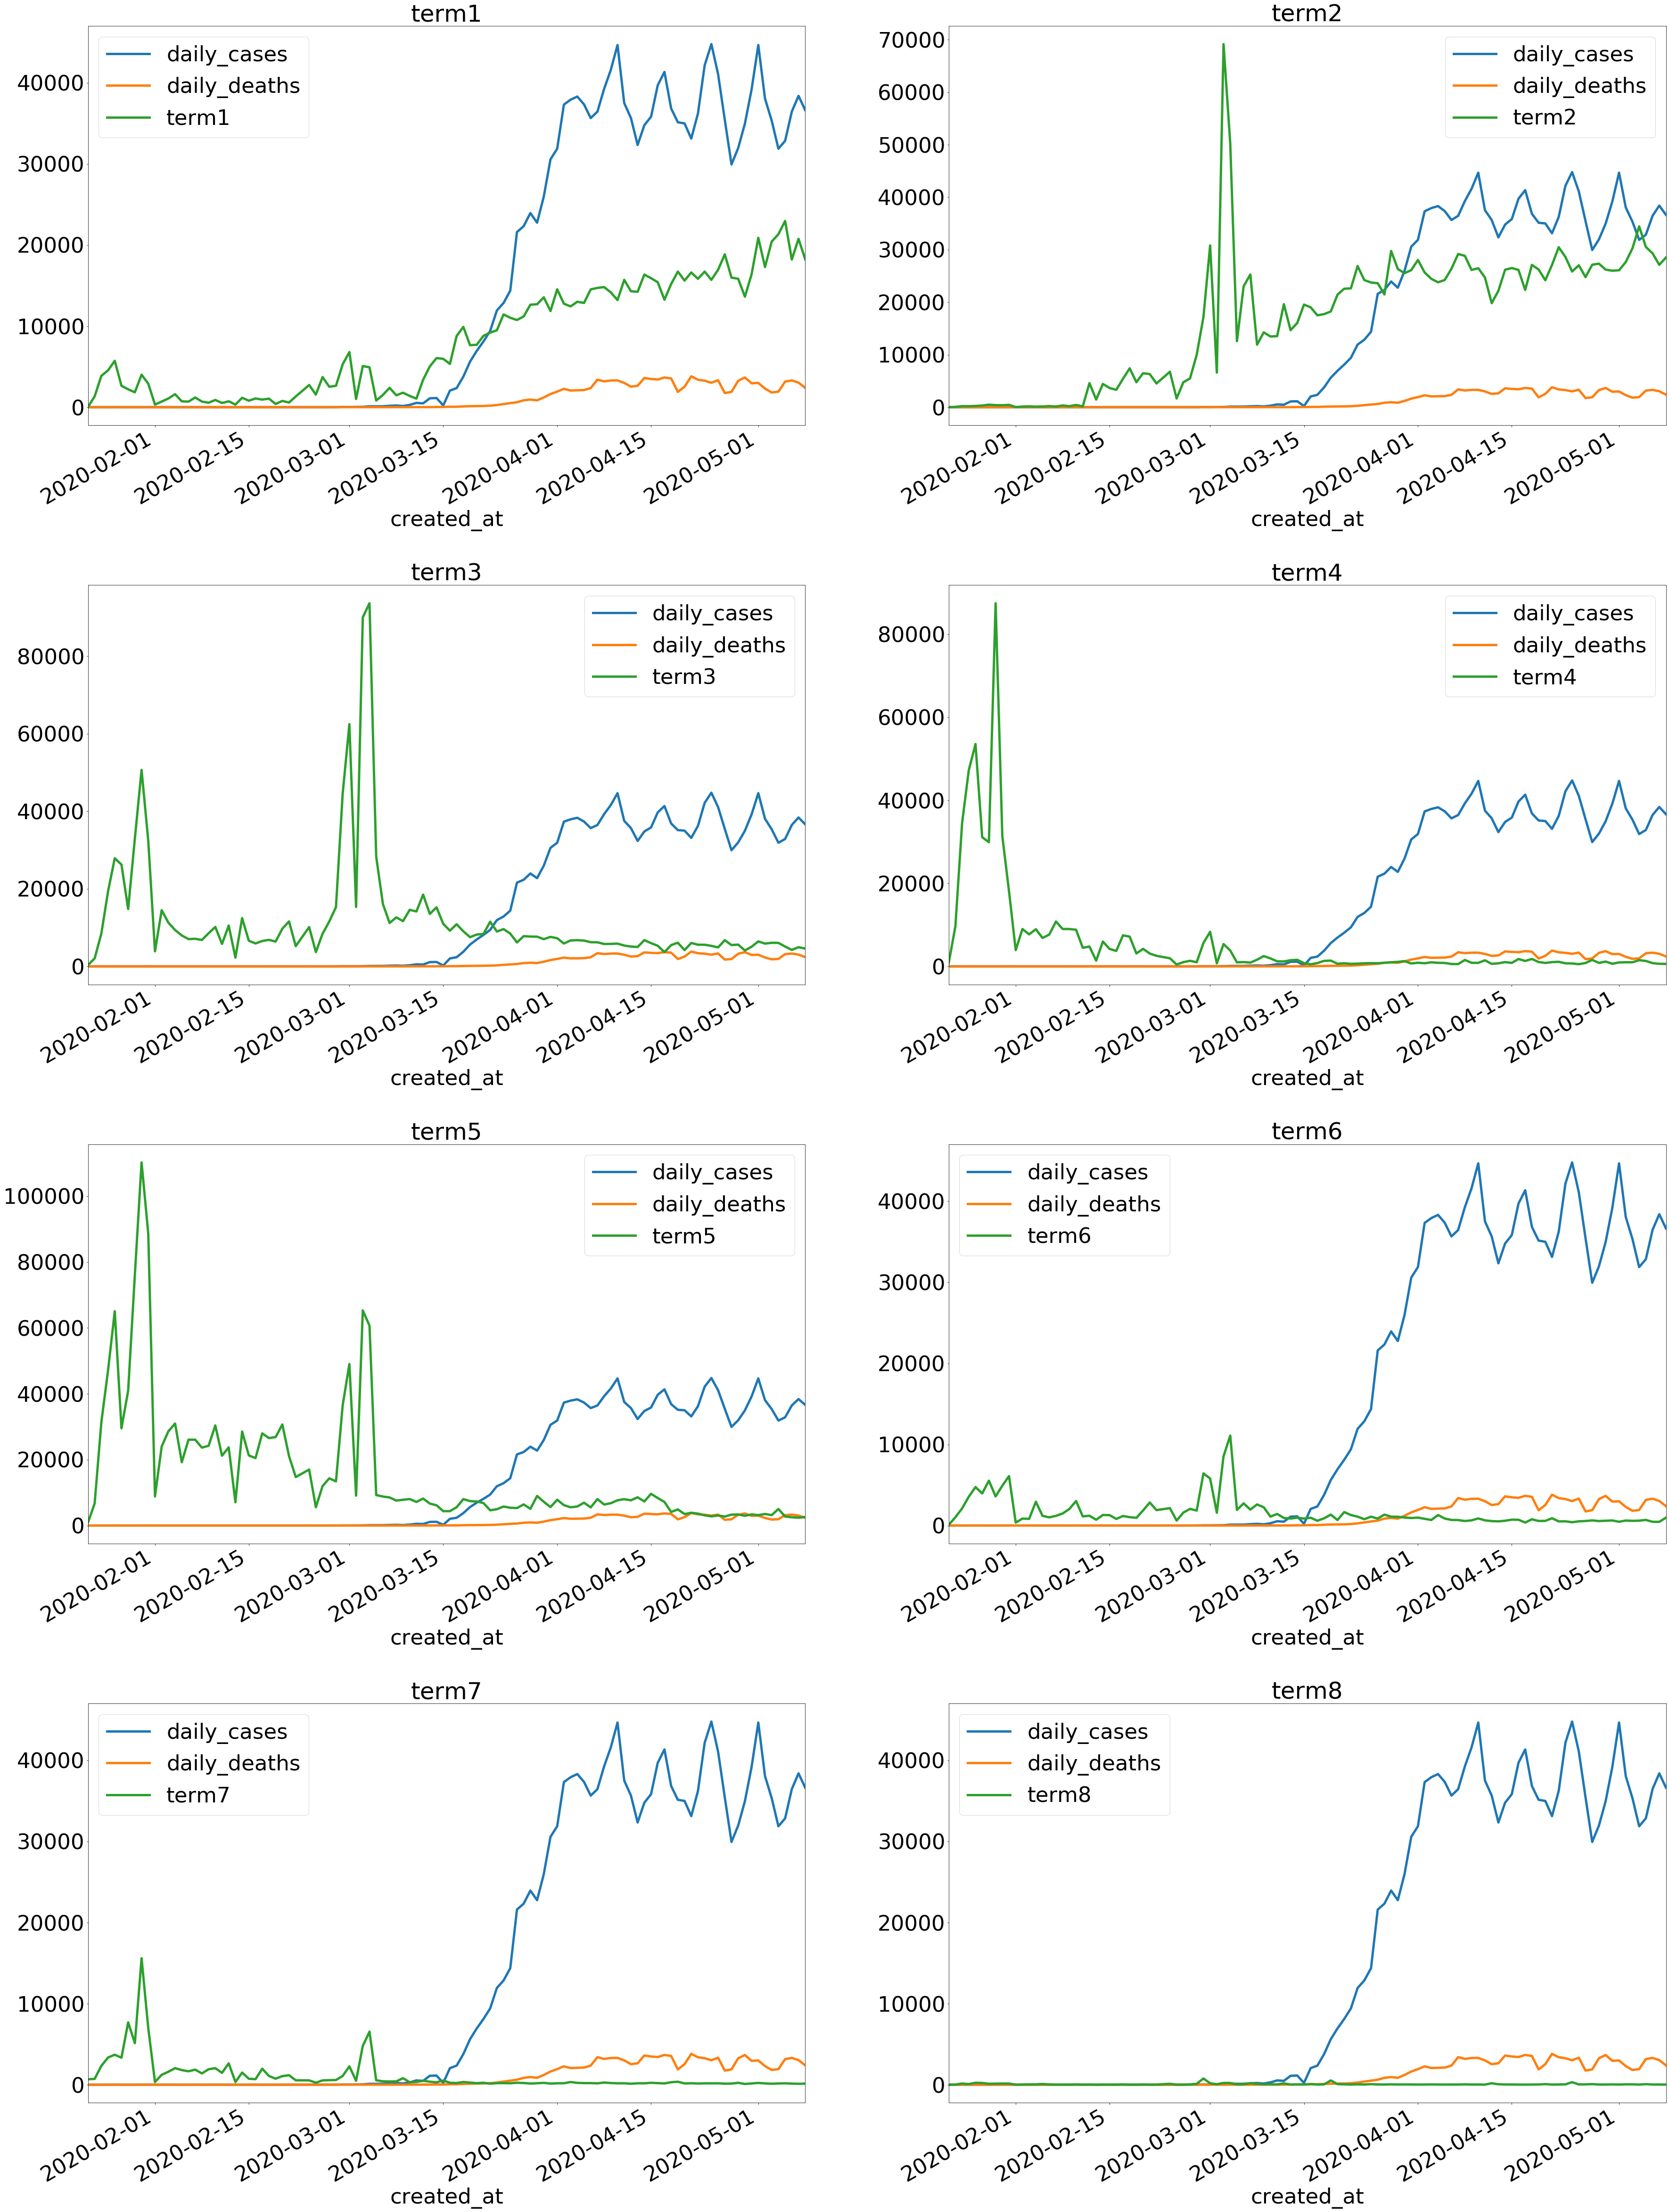

In [580]:
fig1,ax1=plt.subplots(nrows=4,ncols=2,figsize=(60,90))
fig1.subplots_adjust(hspace=0.4)
tsa_plots(dfnew,fig=fig1,row=4,col=2,ax=ax1,size_l=45,size_ax=45,size_t=50,size_p=45,linewidth=5)#,figsize=(45,85))
#ax1[-1,-1].axis("off")

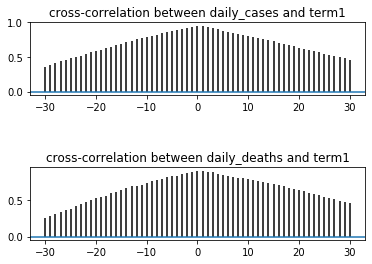

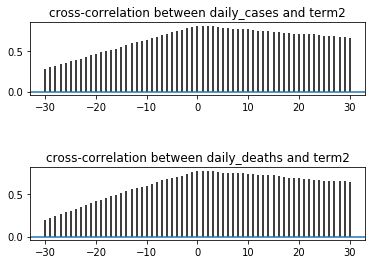

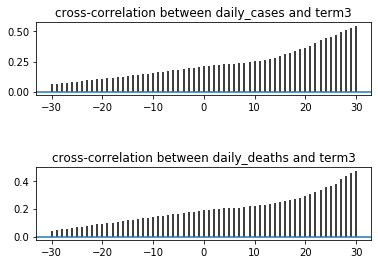

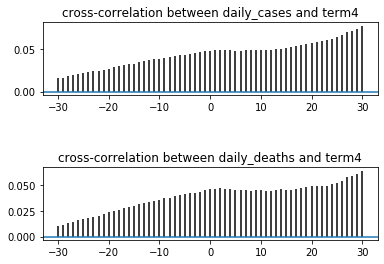

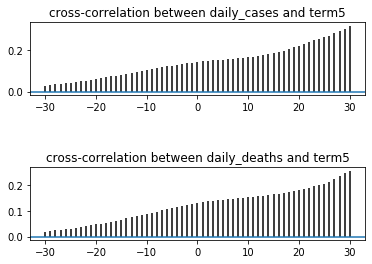

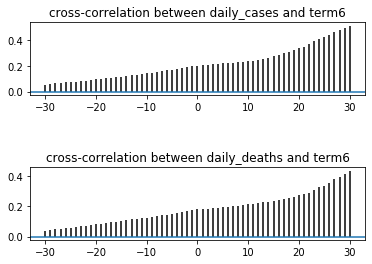

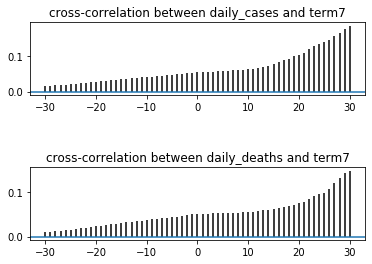

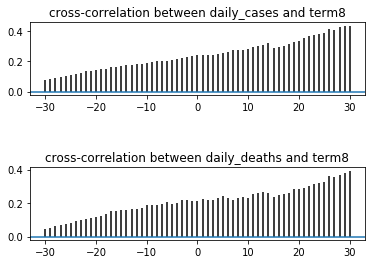

In [121]:
c=1
import matplotlib.pyplot as plt
for i in dfnew.columns[1:-6]:
    f=create_corr(dfnew,i)
    #f.savefig(r"C:\Users\acer\Downloads\terms\cor_clubbed_{}.png".format(i))
    c+=1

In [800]:
clubbed_df(df_terms,dfnew,["covid","stay_home","social_distance","chinavirus"],"term2")

created_at    term1    term2
0    2020-01-22     16.0     16.0
1    2020-01-23   1329.0     62.0
2    2020-01-24   3866.0    198.0
3    2020-01-25   4540.0    189.0
4    2020-01-26   5718.0    239.0
..          ...      ...      ...
102  2020-05-04  21334.0  34441.0
103  2020-05-05  22965.0  30526.0
104  2020-05-06  18209.0  29301.0
105  2020-05-07  20765.0  27117.0
106  2020-05-08  18239.0  28508.0

[107 rows x 3 columns]

In [801]:
df_terms

created_at  china  corona  wuhan  pandemic  lockdown  spread  \
0    2020-01-22    721      29    746        16       0.0     273   
1    2020-01-23   5482     209   9596       104    1225.0    1703   
2    2020-01-24  25626    1364  34392       739    3127.0    6050   
3    2020-01-25  36262    4502  47046      1168    3372.0   11069   
4    2020-01-26  51900    3109  53294      1997    3721.0   22940   
..          ...    ...     ...    ...       ...       ...     ...   
102  2020-05-04   4051    3641   1473      9425   11909.0    1799   
103  2020-05-05   2084    3011   1286     13861    9104.0    1544   
104  2020-05-06   1866    2516    760      8391    9818.0    1243   
105  2020-05-07   1667    2817    591      8019   12746.0    1301   
106  2020-05-08   1776    2708    548      8033   10206.0    1295   

     coronavirus    covid  coronavirus_outbreak  ...  sore throat  runny nose  \
0             13      0.0                    25  ...          0.0         3.0   
1            141      0.0                   911  ...          3.0         3.0   
2           1037      0.0                  4954  ...         13.0         8.0   
3           3768      0.0                  9266  ...         36.0        20.0   
4           1828      0.0                  7367  ...         34.0        27.0   
..           ...      ...                   ...  ...          ...         ...   
102          614  27937.0                   375  ...          1.0         0.0   
103          556  26359.0                   312  ...          4.0         0.0   
104          485  24947.0                   227  ...          1.0         0.0   
105          826  23434.0                   237  ...         17.0         0.0   
106          588  23420.0                   164  ...          3.0         0.0   

     respiratory virus  merscov  daily_frequency  cum_frequency  Confirmed  \
0                  1.0      2.0             2741           2741        1.0   
1                 12.0     13.0            21535          24276        1.0   
2                111.0     23.0            82902         107178        2.0   
3                  9.0    153.0           125457         232635        2.0   
4                151.0     46.0           161112         393747       10.0   
..                 ...      ...              ...            ...        ...   
102                4.0      0.0            69114        6268041  1492645.0   
103               55.0      3.0            63570        6331611  1525492.0   
104                8.0      0.0            55661        6387272  1561950.0   
105                3.0      0.0            56398        6443670  1600341.0   
106                5.0      0.0            55630        6499300  1636974.0   

       deaths  daily_deaths  daily_cases  
0         0.0           0.0          1.0  
1         0.0           0.0          0.0  
2         0.0           0.0          1.0  
3         0.0           0.0          0.0  
4         0.0           0.0          8.0  
..        ...           ...          ...  
102  103731.0        1920.0      31874.0  
103  106889.0        3158.0      32847.0  
104  110194.0        3305.0      36458.0  
105  113223.0        3029.0      38391.0  
106  115611.0        2388.0      36633.0  

[107 rows x 33 columns]

In [764]:
"""
# Clubbing terms with similar Meaning

import pandas
df_clubbed_terms=pandas.DataFrame()

df_clubbed_terms["created_at"]=df_terms["created_at"]
df_clubbed_terms["epidemic"]=df_terms["pandemic"]+df_terms["spread"]
df_clubbed_terms["symptom"]=df_terms["runny nose"]+df_terms["sore throat"]+df_terms["headache"]+df_terms["fever"]\
                            +df_terms["cough"] +df_terms["flu"]
df_clubbed_terms["covid"]=df_terms["covid"]+df_terms["symptomatic"]
df_clubbed_terms["stay_home"]=df_terms["stay_home"]+df_terms["lockdown"]+df_terms["social_distance"]
df_clubbed_terms["china"]=df_terms["china"]+df_terms["wuhan"]
df_clubbed_terms["coronavirus_outbreak"]=df_terms["coronavirus_case"] + df_terms["coronavirus_outbreak"]
df_clubbed_terms["coronavirus"]=df_terms["coronavirus"]+df_terms["corona"]+df_terms["novel_coronavirus"]+df_terms["merscov"]
df_clubbed_terms["respiratory illness"]=df_terms["respiratory illness"] + df_terms["respiratory virus"]
df_clubbed_terms["chinavirus"]=df_terms["wuhanvirus"]+df_terms["chinavirus"]
df_clubbed_terms["facial_mask"]=df_terms["facial_mask"]
df_clubbed_terms
"""

created_at  epidemic  symptom    covid  stay_home   china  \
0    2020-01-22       289    181.0      0.0        2.0    1467   
1    2020-01-23      1807   1228.0      1.0     1243.0   15078   
2    2020-01-24      6789   2238.0      1.0     3200.0   60018   
3    2020-01-25     12237   2706.0      8.0     3435.0   83308   
4    2020-01-26     24937   7448.0    666.0     3839.0  105194   
..          ...       ...      ...      ...        ...     ...   
102  2020-05-04     11224    727.0  27955.0    18366.0    5524   
103  2020-05-05     15405    525.0  26372.0    13258.0    3370   
104  2020-05-06      9634    545.0  24955.0    14152.0    2626   
105  2020-05-07      9320    623.0  23441.0    16405.0    2258   
106  2020-05-08      9328    766.0  23431.0    15244.0    2324   

     coronavirus_outbreak  coronavirus  respiratory illness  chinavirus  \
0                      62        694.0                  8.0          35   
1                    1006       1034.0                 41.0          90   
2                    5605       3864.0                148.0        1008   
3                   11786      10732.0                 46.0        1162   
4                   10531       7437.0                322.0         699   
..                    ...          ...                  ...         ...   
102                   857       4368.0                 12.0          72   
103                   831       3710.0                 58.0          29   
104                   573       3099.0                 15.0          48   
105                   555       3730.0                  4.0          44   
106                  1024       3395.0                  7.0          72   

     facial_mask  
0            3.0  
1            7.0  
2           31.0  
3           37.0  
4           39.0  
..           ...  
102          9.0  
103         12.0  
104         14.0  
105         18.0  
106         39.0  

[107 rows x 11 columns]

In [766]:
#df_clubbed_terms=pd.concat([df_clubbed_terms,daily_data[daily_data.columns[1:]]],axis=1)

In [767]:
#df_clubbed_terms

created_at  epidemic  symptom    covid  stay_home   china  \
0    2020-01-22       289    181.0      0.0        2.0    1467   
1    2020-01-23      1807   1228.0      1.0     1243.0   15078   
2    2020-01-24      6789   2238.0      1.0     3200.0   60018   
3    2020-01-25     12237   2706.0      8.0     3435.0   83308   
4    2020-01-26     24937   7448.0    666.0     3839.0  105194   
..          ...       ...      ...      ...        ...     ...   
102  2020-05-04     11224    727.0  27955.0    18366.0    5524   
103  2020-05-05     15405    525.0  26372.0    13258.0    3370   
104  2020-05-06      9634    545.0  24955.0    14152.0    2626   
105  2020-05-07      9320    623.0  23441.0    16405.0    2258   
106  2020-05-08      9328    766.0  23431.0    15244.0    2324   

     coronavirus_outbreak  coronavirus  respiratory illness  chinavirus  \
0                      62        694.0                  8.0          35   
1                    1006       1034.0                 41.0          90   
2                    5605       3864.0                148.0        1008   
3                   11786      10732.0                 46.0        1162   
4                   10531       7437.0                322.0         699   
..                    ...          ...                  ...         ...   
102                   857       4368.0                 12.0          72   
103                   831       3710.0                 58.0          29   
104                   573       3099.0                 15.0          48   
105                   555       3730.0                  4.0          44   
106                  1024       3395.0                  7.0          72   

     facial_mask  daily_frequency  cum_frequency  Confirmed    deaths  \
0            3.0             2741           2741        1.0       0.0   
1            7.0            21535          24276        1.0       0.0   
2           31.0            82902         107178        2.0       0.0   
3           37.0           125457         232635        2.0       0.0   
4           39.0           161112         393747       10.0       0.0   
..           ...              ...            ...        ...       ...   
102          9.0            69114        6268041  1492645.0  103731.0   
103         12.0            63570        6331611  1525492.0  106889.0   
104         14.0            55661        6387272  1561950.0  110194.0   
105         18.0            56398        6443670  1600341.0  113223.0   
106         39.0            55630        6499300  1636974.0  115611.0   

     daily_deaths  daily_cases  
0             0.0          1.0  
1             0.0          0.0  
2             0.0          1.0  
3             0.0          0.0  
4             0.0          8.0  
..            ...          ...  
102        1920.0      31874.0  
103        3158.0      32847.0  
104        3305.0      36458.0  
105        3029.0      38391.0  
106        2388.0      36633.0  

[107 rows x 17 columns]

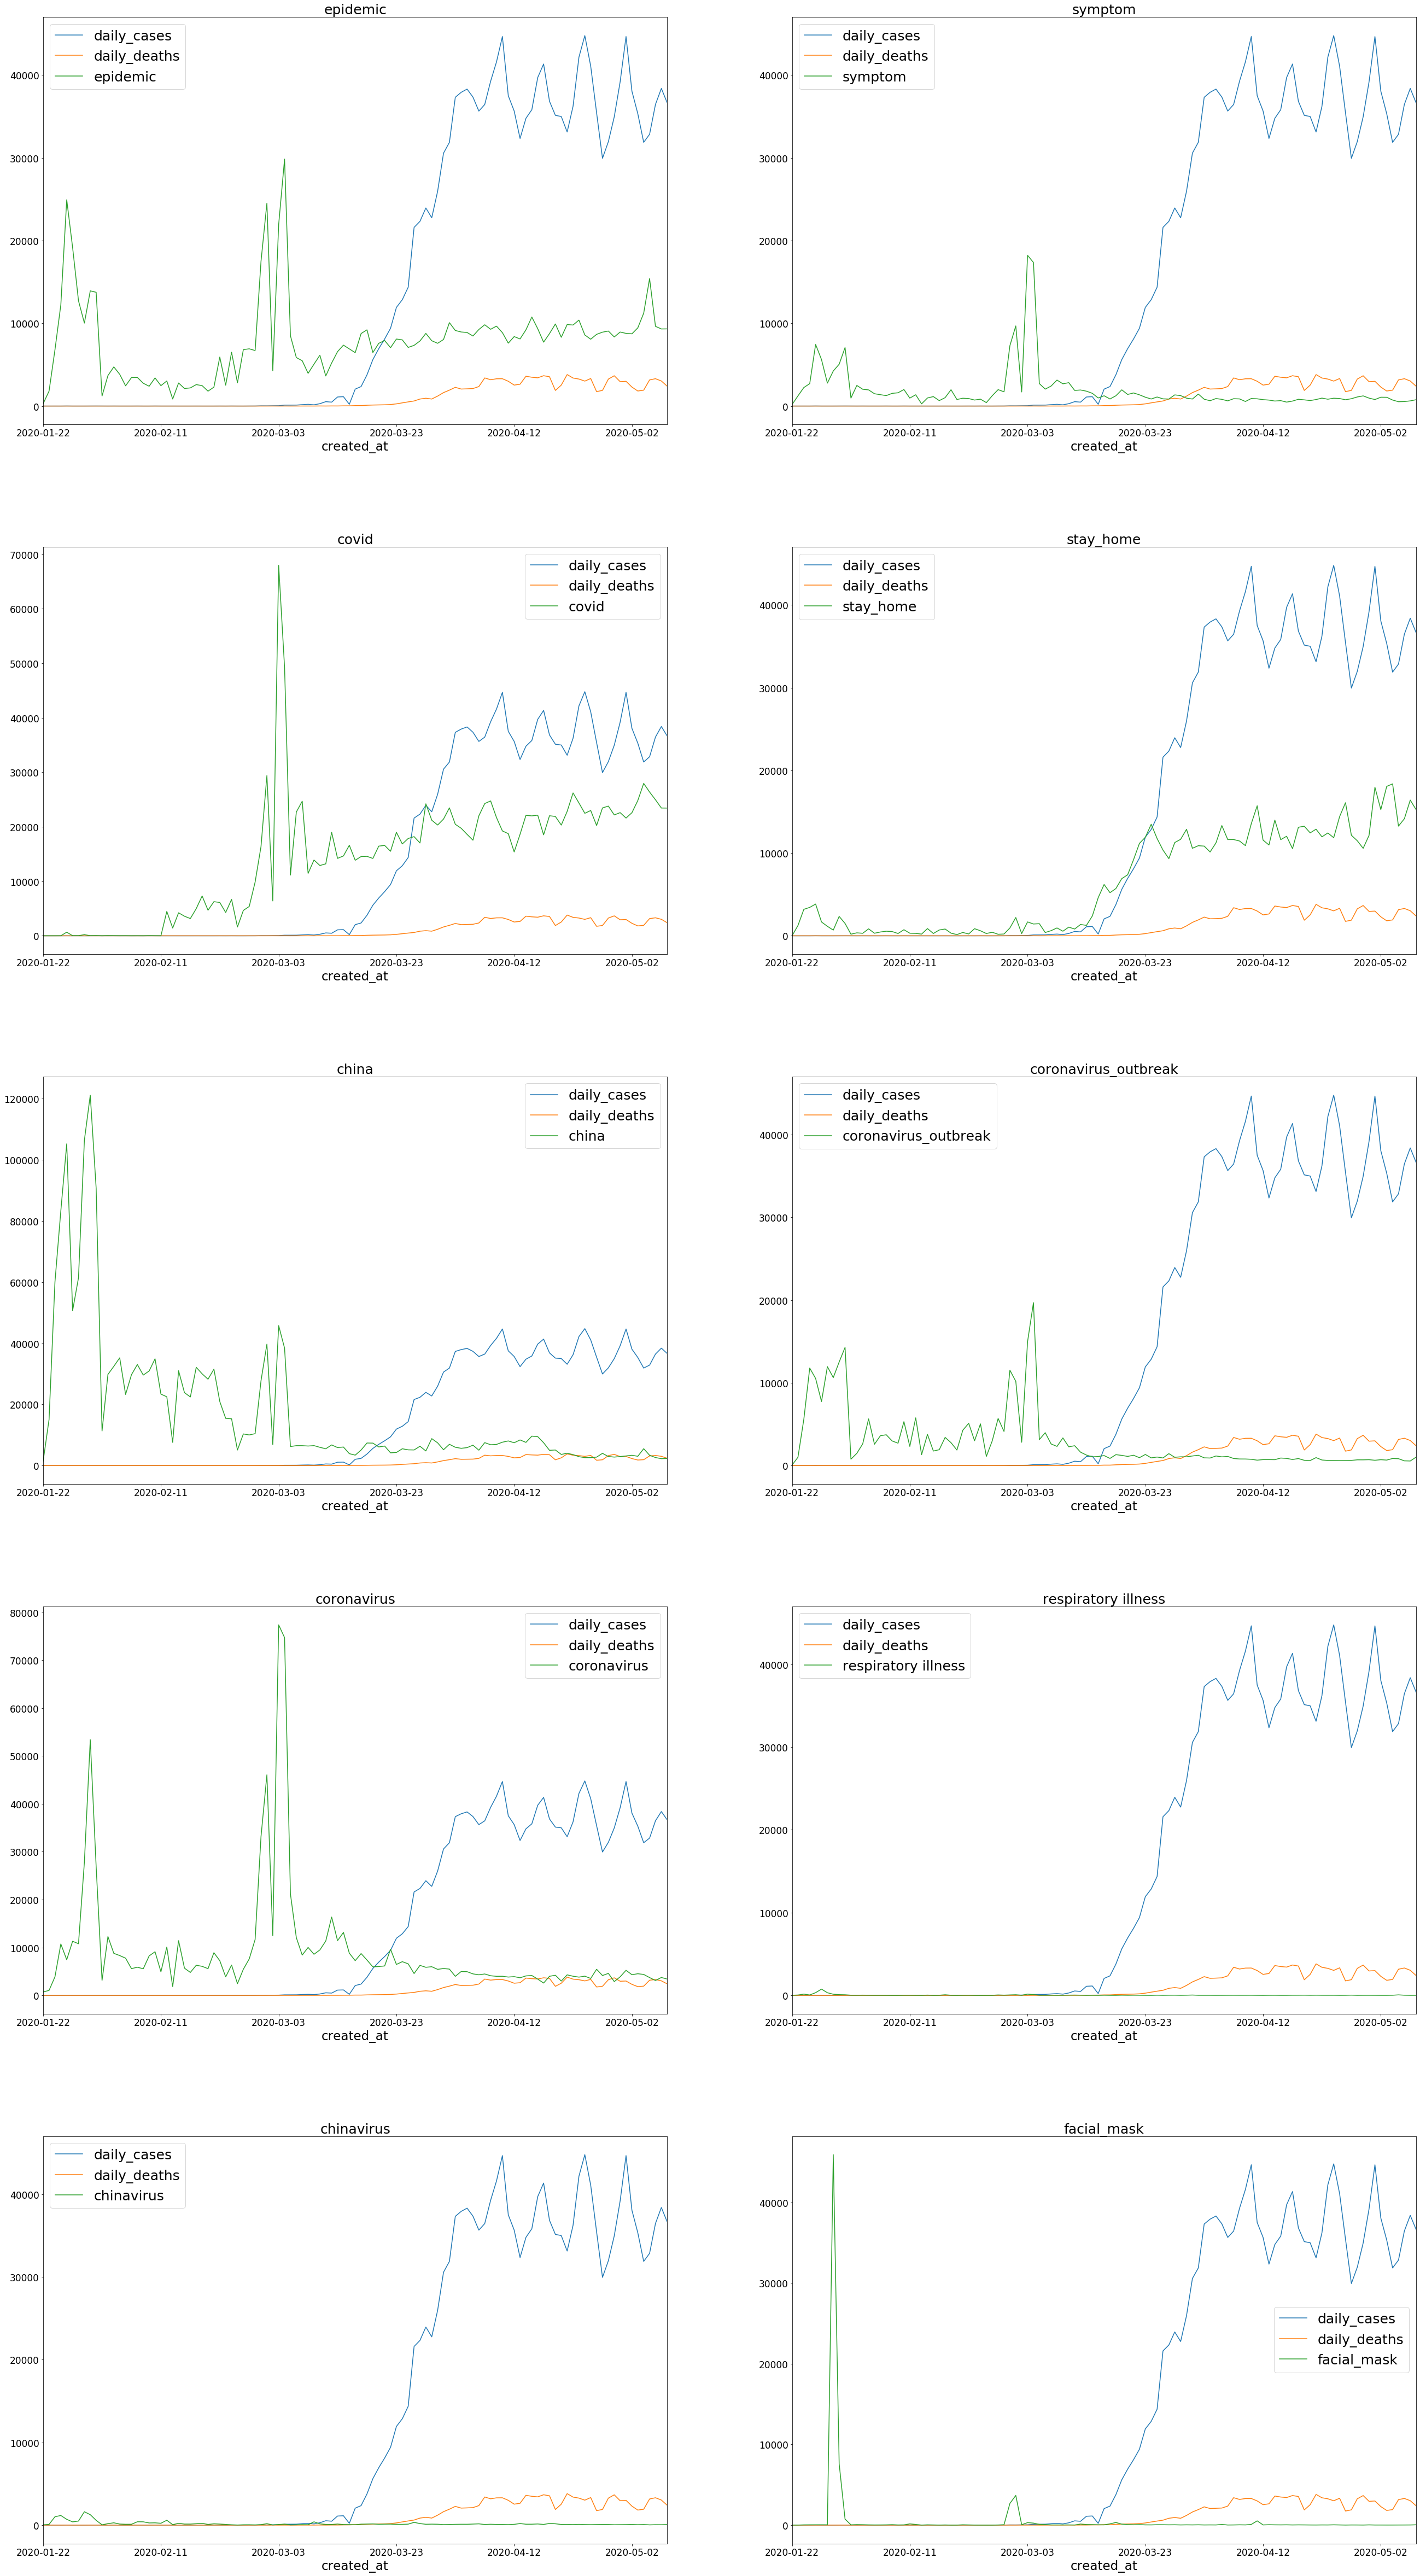

In [775]:
tsa_plots(df_clubbed_terms,fig=fig1,row=5,col=2,figsize=(45,85))

correlation between epidemic and infections is 0.20569223482650065
correlation between epidemic and mortality is 0.20717636531498115
correlation between symptom and infections is -0.3390280733547213
correlation between symptom and mortality is -0.3108058836047903
correlation between covid and infections is 0.5719260040388057
correlation between covid and mortality is 0.5352354005958561
correlation between stay_home and infections is 0.9184880854791714
correlation between stay_home and mortality is 0.8278577089928814
correlation between china and infections is -0.46180710085610027
correlation between china and mortality is -0.4115730638545874
correlation between coronavirus_outbreak and infections is -0.4965652396259661
correlation between coronavirus_outbreak and mortality is -0.4489051521880212
correlation between coronavirus and infections is -0.3482297196097198
correlation between coronavirus and mortality is -0.32503938106676306
correlation between respiratory illness and infection

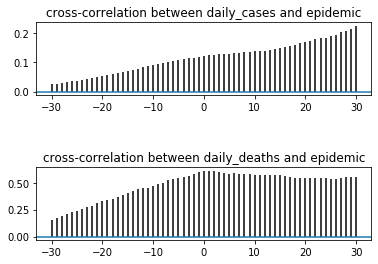

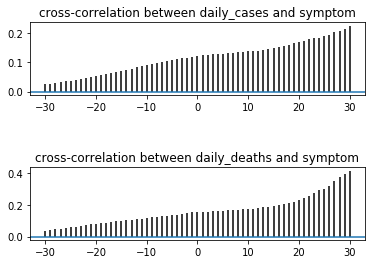

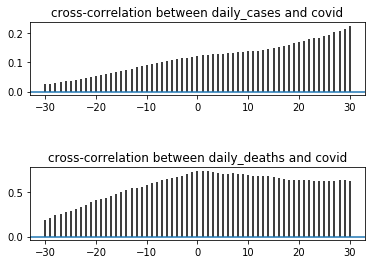

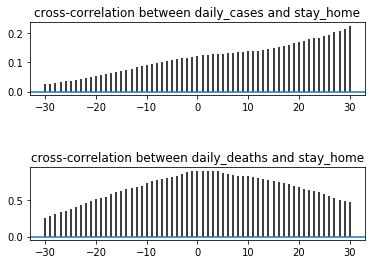

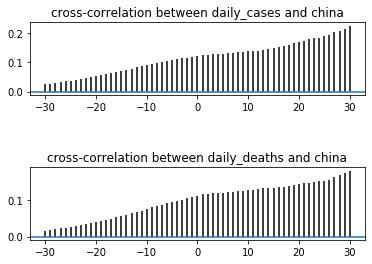

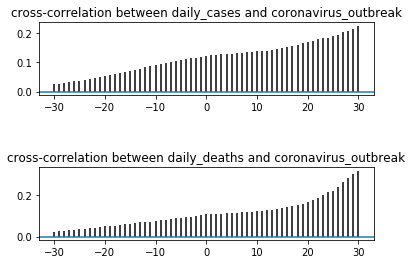

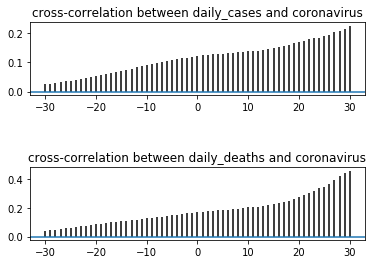

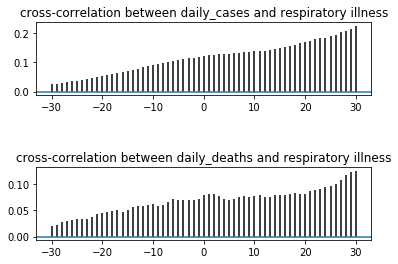

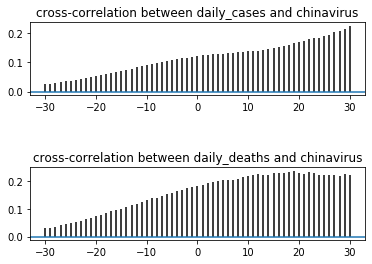

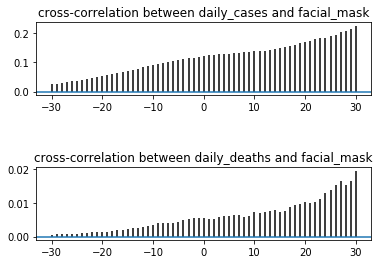

In [781]:
for i in df_clubbed_terms.columns[1:-6]:
    create_corr(df_clubbed_terms,i)
    r_c=df_clubbed_terms[i].corr(df_clubbed_terms["daily_cases"])
    print("correlation between {} and infections is {}".format(i,r_c))
    r_d=df_clubbed_terms[i].corr(df_clubbed_terms["daily_deaths"])
    print("correlation between {} and mortality is {}".format(i,r_d))


# Weekly and Monthly analysis

In [139]:
daily_data["created_at"]=pd.to_datetime(daily_data["created_at"])

In [140]:
daily_data["created_at"]

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
102   2020-05-04
103   2020-05-05
104   2020-05-06
105   2020-05-07
106   2020-05-08
Name: created_at, Length: 107, dtype: datetime64[ns]

In [141]:
daily_data["week_no"]=daily_data["created_at"].dt.week

In [142]:
daily_data["month_no"]=daily_data["created_at"].dt.month

In [143]:
daily_data


created_at  daily_frequency  Confirmed    Deaths  daily_cases  \
0   2020-01-22             2741        1.0       0.0          1.0   
1   2020-01-23            21535        1.0       0.0          0.0   
2   2020-01-24            82902        2.0       0.0          1.0   
3   2020-01-25           125457        2.0       0.0          0.0   
4   2020-01-26           161112       10.0       0.0          8.0   
..         ...              ...        ...       ...          ...   
102 2020-05-04            69114  1492645.0  103731.0      31874.0   
103 2020-05-05            63570  1525492.0  106889.0      32847.0   
104 2020-05-06            55661  1561950.0  110194.0      36458.0   
105 2020-05-07            56398  1600341.0  113223.0      38391.0   
106 2020-05-08            55630  1636974.0  115611.0      36633.0   

     daily_deaths  cum_frequency  week_no  month_no  
0             0.0           2741        4         1  
1             0.0          24276        4         1  
2             0.0         107178        4         1  
3             0.0         232635        4         1  
4             0.0         393747        4         1  
..            ...            ...      ...       ...  
102        1920.0        6268041       19         5  
103        3158.0        6331611       19         5  
104        3305.0        6387272       19         5  
105        3029.0        6443670       19         5  
106        2388.0        6499300       19         5  

[107 rows x 9 columns]

In [144]:
df_week=daily_data.groupby("week_no").sum().reset_index()


In [145]:
df_week.drop(["month_no"],inplace=True,axis=1)

In [146]:
df_week.rename({"daily_frequency":"weekly_frequency","deaths":"weekly_cum_deaths","daily_cases":"weekly_cases","daily_deaths":"weekly_deaths","confirmed":"week_cum_cases"},inplace=True,axis=1)

In [147]:
df_week

week_no  weekly_frequency  Confirmed    Deaths  weekly_cases  \
0         4            393747       16.0       0.0          10.0   
1         5            847539      131.0       0.0          18.0   
2         6            327812      251.0       0.0          11.0   
3         7            282172      323.0       0.0           8.0   
4         8            278060      294.0       0.0           4.0   
5         9            452852      518.0       3.0          70.0   
6        10            711677     3215.0     106.0         788.0   
7        11            305302    19405.0     451.0        3874.0   
8        12            321114   149686.0    3418.0       38234.0   
9        13            368265   757529.0   20855.0      129759.0   
10       14            376155  2110988.0   86551.0      239303.0   
11       15            385959  3960173.0  214520.0      270793.0   
12       16            386603  5785936.0  368653.0      255964.0   
13       17            376580  7617345.0  521117.0      267824.0   
14       18            385090  9424979.0  658917.0      254111.0   
15       19            300373  7817402.0  549648.0      176203.0   

    weekly_deaths  cum_frequency  
0             0.0         760577  
1             0.0        6507384  
2             0.0       10029587  
3             0.0       12156875  
4             0.0       12133588  
5             2.0       16123743  
6            24.0       21484332  
7            95.0       24257743  
8           800.0       26438861  
9          4405.0       28889880  
10        13265.0       31545191  
11        21058.0       34224092  
12        22229.0       36906372  
13        21071.0       39561572  
14        18862.0       42201029  
15        13800.0       31929894

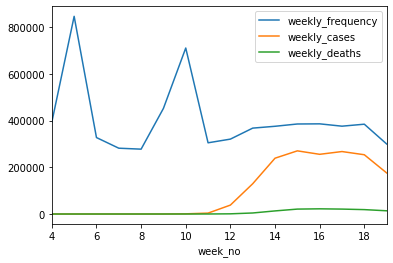

In [511]:
df_week.plot.line(x="week_no",y=["weekly_frequency","weekly_cases","weekly_deaths"])

In [566]:
df_week["weekly_frequency"].corr(df_week["weekly_cases"])

-0.20824976546102636

In [148]:
df_week["delta_case"]=df_week["weekly_cases"].diff()
df_week.loc[0,"delta_case"]=df_week.loc[0,"weekly_cases"]

df_week["delta_frequency"]=df_week["weekly_frequency"].diff()
df_week.loc[0,"delta_frequency"]=df_week.loc[0,"weekly_frequency"]

df_week["delta_deaths"]=df_week["weekly_deaths"].diff()
df_week.loc[0,"delta_deaths"]=df_week.loc[0,"weekly_deaths"]


In [149]:
df_week

week_no  weekly_frequency  Confirmed    Deaths  weekly_cases  \
0         4            393747       16.0       0.0          10.0   
1         5            847539      131.0       0.0          18.0   
2         6            327812      251.0       0.0          11.0   
3         7            282172      323.0       0.0           8.0   
4         8            278060      294.0       0.0           4.0   
5         9            452852      518.0       3.0          70.0   
6        10            711677     3215.0     106.0         788.0   
7        11            305302    19405.0     451.0        3874.0   
8        12            321114   149686.0    3418.0       38234.0   
9        13            368265   757529.0   20855.0      129759.0   
10       14            376155  2110988.0   86551.0      239303.0   
11       15            385959  3960173.0  214520.0      270793.0   
12       16            386603  5785936.0  368653.0      255964.0   
13       17            376580  7617345.0  521117.0      267824.0   
14       18            385090  9424979.0  658917.0      254111.0   
15       19            300373  7817402.0  549648.0      176203.0   

    weekly_deaths  cum_frequency  delta_case  delta_frequency  delta_deaths  
0             0.0         760577        10.0         393747.0           0.0  
1             0.0        6507384         8.0         453792.0           0.0  
2             0.0       10029587        -7.0        -519727.0           0.0  
3             0.0       12156875        -3.0         -45640.0           0.0  
4             0.0       12133588        -4.0          -4112.0           0.0  
5             2.0       16123743        66.0         174792.0           2.0  
6            24.0       21484332       718.0         258825.0          22.0  
7            95.0       24257743      3086.0        -406375.0          71.0  
8           800.0       26438861     34360.0          15812.0         705.0  
9          4405.0       28889880     91525.0          47151.0        3605.0  
10        13265.0       31545191    109544.0           7890.0        8860.0  
11        21058.0       34224092     31490.0           9804.0        7793.0  
12        22229.0       36906372    -14829.0            644.0        1171.0  
13        21071.0       39561572     11860.0         -10023.0       -1158.0  
14        18862.0       42201029    -13713.0           8510.0       -2209.0  
15        13800.0       31929894    -77908.0         -84717.0       -5062.0

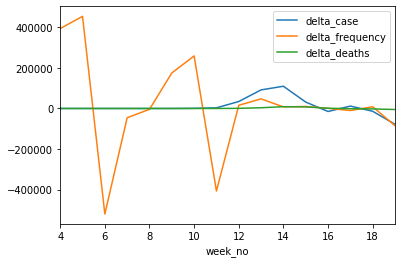

In [518]:
df_week.plot.line(x="week_no",y=["delta_case","delta_frequency","delta_deaths"])

0.832228379844984


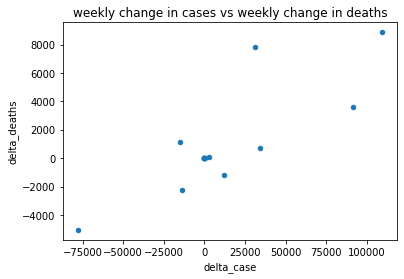

In [151]:
df_week.plot.scatter(x="delta_case",y="delta_deaths")
plt.title("weekly change in cases vs weekly change in deaths")
print(df_week["delta_case"].corr(df_week["delta_deaths"]))

0.05130508163256062


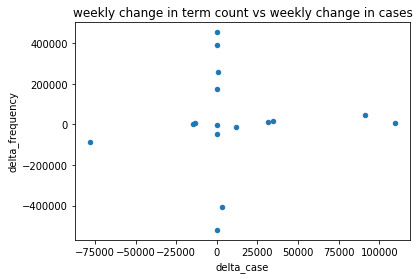

In [152]:
df_week.plot.scatter(x="delta_case",y="delta_frequency")
plt.title("weekly change in term count vs weekly change in cases")
print(df_week["delta_case"].corr(df_week["delta_frequency"]))

0.037385625817748964


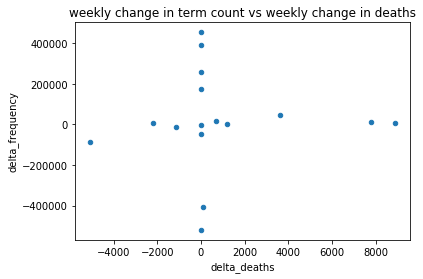

In [153]:
df_week.plot.scatter(x="delta_deaths",y="delta_frequency")
plt.title("weekly change in term count vs weekly change in deaths")
print(df_week["delta_frequency"].corr(df_week["delta_deaths"]))

In [127]:
df_terms_week=df_terms
df_terms["created_at"]=pd.to_datetime(df_terms["created_at"])
df_terms_week["week_no"]=df_terms["created_at"].dt.week
df_terms_week=df_terms.groupby("week_no").sum().reset_index()

In [128]:
df_terms_week

week_no   china  corona   wuhan  pandemic  lockdown  spread  coronavirus  \
0         4  119991    9213  145074      4024   11445.0   42035         6787   
1         5  316602   59069  154703      8049    6561.0   66448        49844   
2         6  154595   22850   59619      4103    2425.0   18964        16288   
3         7  132720   25490   32911      2809    2687.0   14037        14150   
4         8  130899   19583   27356      3214    1848.0   14375        12319   
5         9  105532   67025   13072     22921    2336.0   48844        40203   
6        10  103283  124330   13375     15641    1556.0   64197        78648   
7        11   30412   50522   10184     19272    5399.0   21626        26459   
8        12   34716   37646    5151     38691   18678.0   14757        12300   
9        13   34367   31024    5582     40551   38679.0   14513        10806   
10       14   37838   26480    5900     47110   43893.0   14045         7318   
11       15   43756   22110    5661     50135   51287.0   12744         5487   
12       16   44360   20366    8233     50665   56416.0   13168         4784   
13       17   16599   22146    5532     52639   63636.0   11045         5118   
14       18   15290   22764    6957     52254   68192.0   10004         5878   
15       19   11444   14693    4658     47729   53783.0    7182         3069   

       covid  coronavirus_outbreak  ...  sore throat  runny nose  \
0        0.0                 22523  ...         86.0        61.0   
1        0.0                 41338  ...        266.0       139.0   
2        0.0                 16665  ...         38.0        19.0   
3    16861.0                 15033  ...         37.0        22.0   
4    33627.0                 12521  ...         24.0         9.0   
5    73890.0                 24851  ...        340.0       439.0   
6   193396.0                 27847  ...        230.0       327.0   
7   104318.0                  7940  ...        160.0        57.0   
8   105555.0                  4246  ...        594.0        62.0   
9   134208.0                  3006  ...         93.0        23.0   
10  141394.0                  3202  ...         37.0        30.0   
11  145927.0                  2695  ...         23.0        17.0   
12  147033.0                  2434  ...         33.0        27.0   
13  159295.0                  1817  ...         33.0       319.0   
14  160942.0                  1872  ...         65.0        19.0   
15  126097.0                  1315  ...         26.0         0.0   

    respiratory virus  merscov  daily_frequency  Confirmed    Deaths  \
0               284.0    237.0           393747       16.0       0.0   
1               120.0    445.0           847539      131.0       0.0   
2                45.0     24.0           327812      251.0       0.0   
3                34.0     22.0           282172      323.0       0.0   
4                48.0     19.0           278060      294.0       0.0   
5                69.0     23.0           452852      518.0       3.0   
6                89.0     32.0           711677     3215.0     106.0   
7                50.0      7.0           305302    19405.0     451.0   
8                47.0      3.0           321114   149686.0    3418.0   
9                40.0      6.0           368265   757529.0   20855.0   
10               24.0      4.0           376155  2110988.0   86551.0   
11               36.0      4.0           385959  3960173.0  214520.0   
12               39.0      5.0           386603  5785936.0  368653.0   
13               31.0      8.0           376580  7617345.0  521117.0   
14               37.0      3.0           385090  9424979.0  658917.0   
15               75.0      3.0           300373  7817402.0  549648.0   

    daily_cases  daily_deaths  cum_frequency  
0          10.0           0.0         760577  
1          18.0           0.0        6507384  
2          11.0           0.0       10029587  
3           8.0           0.0       12156875  
4           4.0           

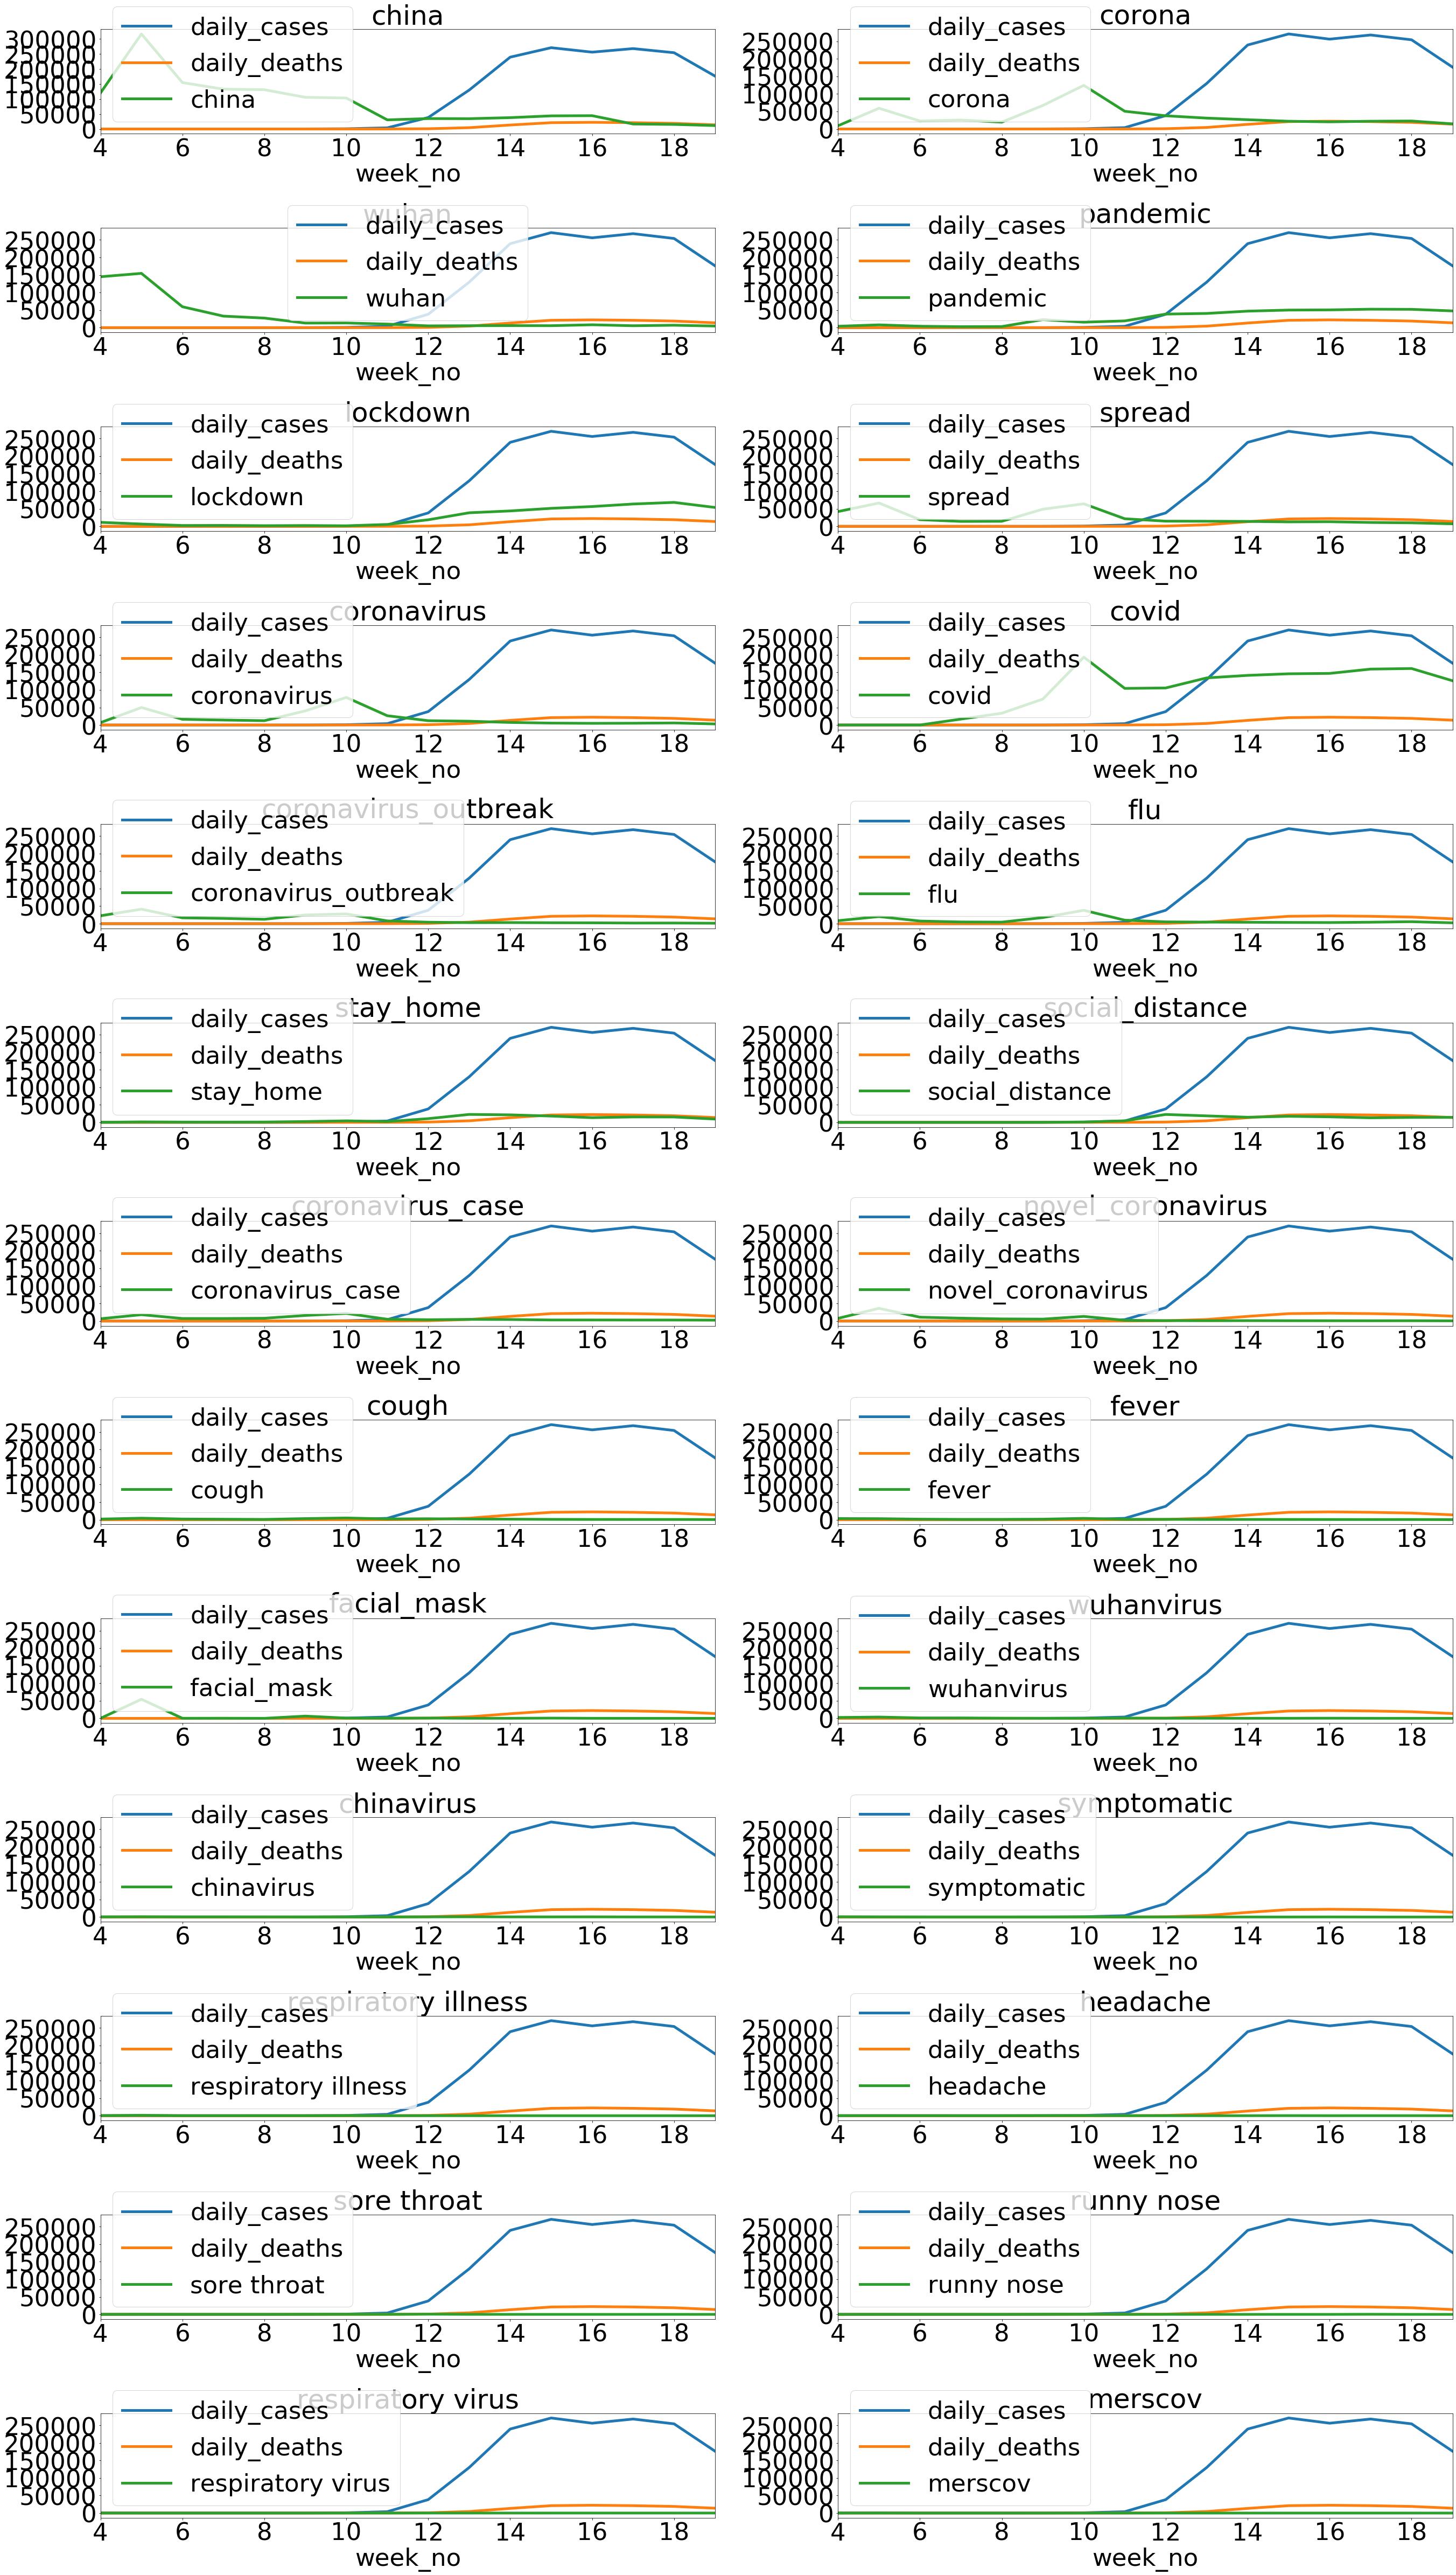

In [137]:
fig2,ax2=plt.subplots(nrows=13,ncols=2,figsize=(45,85))
fig2.subplots_adjust(hspace=0.9)
tsa_plots(df_terms_week,fig=fig2,row=13,col=2,ax=ax2,size_l=45,size_ax=45,size_t=50,size_p=45,linewidth=5,start=1,end=-6,xcol="week_no")#,figsize=(45,85))
#ax2[-1,-1].axis("off")